# Sommaire :
 - <a href="#C1">Import</a>
 
**Découverte des données**
 - <a href="#C2">Suppression des colonnes supperflues</a>
 - <a href="#C3">Pourcentage de remplissage des colonnes</a>
 - <a href="#C4">Changer le type de certaines colonnes a category</a>
 - <a href="#C5">Etat des données avant le nettoyage</a>

**Nettoyage** 
 - <a href="#C6">Remplacer les outliers des nutriments</a>
 - <a href="#C7">Remplacement des NaN des additifs</a>
 - <a href="#C8">Supression des individus qui ne possedent aucun nutriments</a>
 - <a href="#C9">Suppression des colonnes avec un code null</a>
 - <a href="#C10">Completion des nutriscore manquants</a>
 - <a href="#C11">Suppression des individus qui ne possedent pas de nom de produits</a>
 
**Analyse bivariée**
 - <a href="#C12">Nutrigrade et nutriscore</a>
 - <a href="#C13">Rapport</a>
 - <a href="#C14">Repartition des nutrigrades</a>
 - <a href="#C15">Scatter plot Nutriscore - Graisse Saturee (Correlées)</a>
 - <a href="#C16">Scatter plot Nutriscore - Fibree (Moins Correlées)</a>
 - <a href="#C17">Scatter plot Sel - Sodium (Trés Correlées)</a>
 - <a href="#C18">ACP</a>
 - <a href="#C19">ANOVA</a>

**<a href="#20">Fonctions nettoyage réutilisables**

# <a name="C1">Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from ydata_profiling import ProfileReport
from sklearn import decomposition, preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
import missingno as msno
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
sns.set()

In [3]:
data = pd.read_csv('food.csv', sep='\t', low_memory=False)
display(data.head(5))

code                                                url  \
0  0000000003087  http://world-fr.openfoodfacts.org/produit/0000...   
1  0000000004530  http://world-fr.openfoodfacts.org/produit/0000...   
2  0000000004559  http://world-fr.openfoodfacts.org/produit/0000...   
3  0000000016087  http://world-fr.openfoodfacts.org/produit/0000...   
4  0000000016094  http://world-fr.openfoodfacts.org/produit/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)   
2      1489069957   2017-03-09T14:32:37Z                         Peanuts   
3      1489055731   2017-03-09T10:35:31Z          Organic Salted Nut Mix   
4      1489055653   2017-03-09T10:34:13Z                 Organic Polenta   

  generic_name quantity  ... ph_100g fruits-vegetables-nuts_100g  \
0          NaN      1kg  ...     NaN                         NaN   
1          NaN      NaN  ...     NaN                         NaN   
2          NaN      NaN  ...     NaN                         NaN   
3          NaN      NaN  ...     NaN                         NaN   
4          NaN      NaN  ...     NaN                         NaN   

  collagen-meat-protein-ratio_100g cocoa_100g chlorophyl_100g  \
0                              NaN        NaN             NaN   
1                              NaN        NaN             NaN   
2                              NaN        NaN             NaN   
3                              NaN        NaN             NaN   
4                              NaN        NaN             NaN   

  carbon-footprint_100g nutrition-score-fr_100g nutrition-score-uk_100g  \
0                   NaN                     NaN                     NaN   
1                   NaN                    14.0                    14.0   
2                   NaN                     0.0                     0.0   
3                   NaN                    12.0                    12.0   
4                   NaN                     NaN                     NaN   

  glycemic-index_100g water-hardness_100g  
0                 NaN                 NaN  
1                 NaN                 NaN  
2                 NaN                 NaN  
3                 NaN                 NaN  
4                 NaN                 NaN  

[5 rows x 162 columns]

# Découverte des données

In [4]:
data.shape

(320772, 162)

## <a name="C2">Suppression des colonnes supperflues

In [5]:
dict(data.isnull().sum())

{'code': 23,
 'url': 23,
 'creator': 2,
 'created_t': 3,
 'created_datetime': 9,
 'last_modified_t': 0,
 'last_modified_datetime': 0,
 'product_name': 17762,
 'generic_name': 267977,
 'quantity': 215953,
 'packaging': 241812,
 'packaging_tags': 241811,
 'brands': 28412,
 'brands_tags': 28420,
 'categories': 236362,
 'categories_tags': 236383,
 'categories_fr': 236361,
 'origins': 298582,
 'origins_tags': 298619,
 'manufacturing_places': 284271,
 'manufacturing_places_tags': 284277,
 'labels': 274213,
 'labels_tags': 274128,
 'labels_fr': 274106,
 'emb_codes': 291466,
 'emb_codes_tags': 291469,
 'first_packaging_code_geo': 301969,
 'cities': 320749,
 'cities_tags': 300452,
 'purchase_places': 262579,
 'stores': 269050,
 'countries': 280,
 'countries_tags': 280,
 'countries_fr': 280,
 'ingredients_text': 71810,
 'allergens': 292428,
 'allergens_fr': 320753,
 'traces': 296419,
 'traces_tags': 296443,
 'traces_fr': 296420,
 'serving_size': 109441,
 'no_nutriments': 320772,
 'additives_n': 

<Axes: >

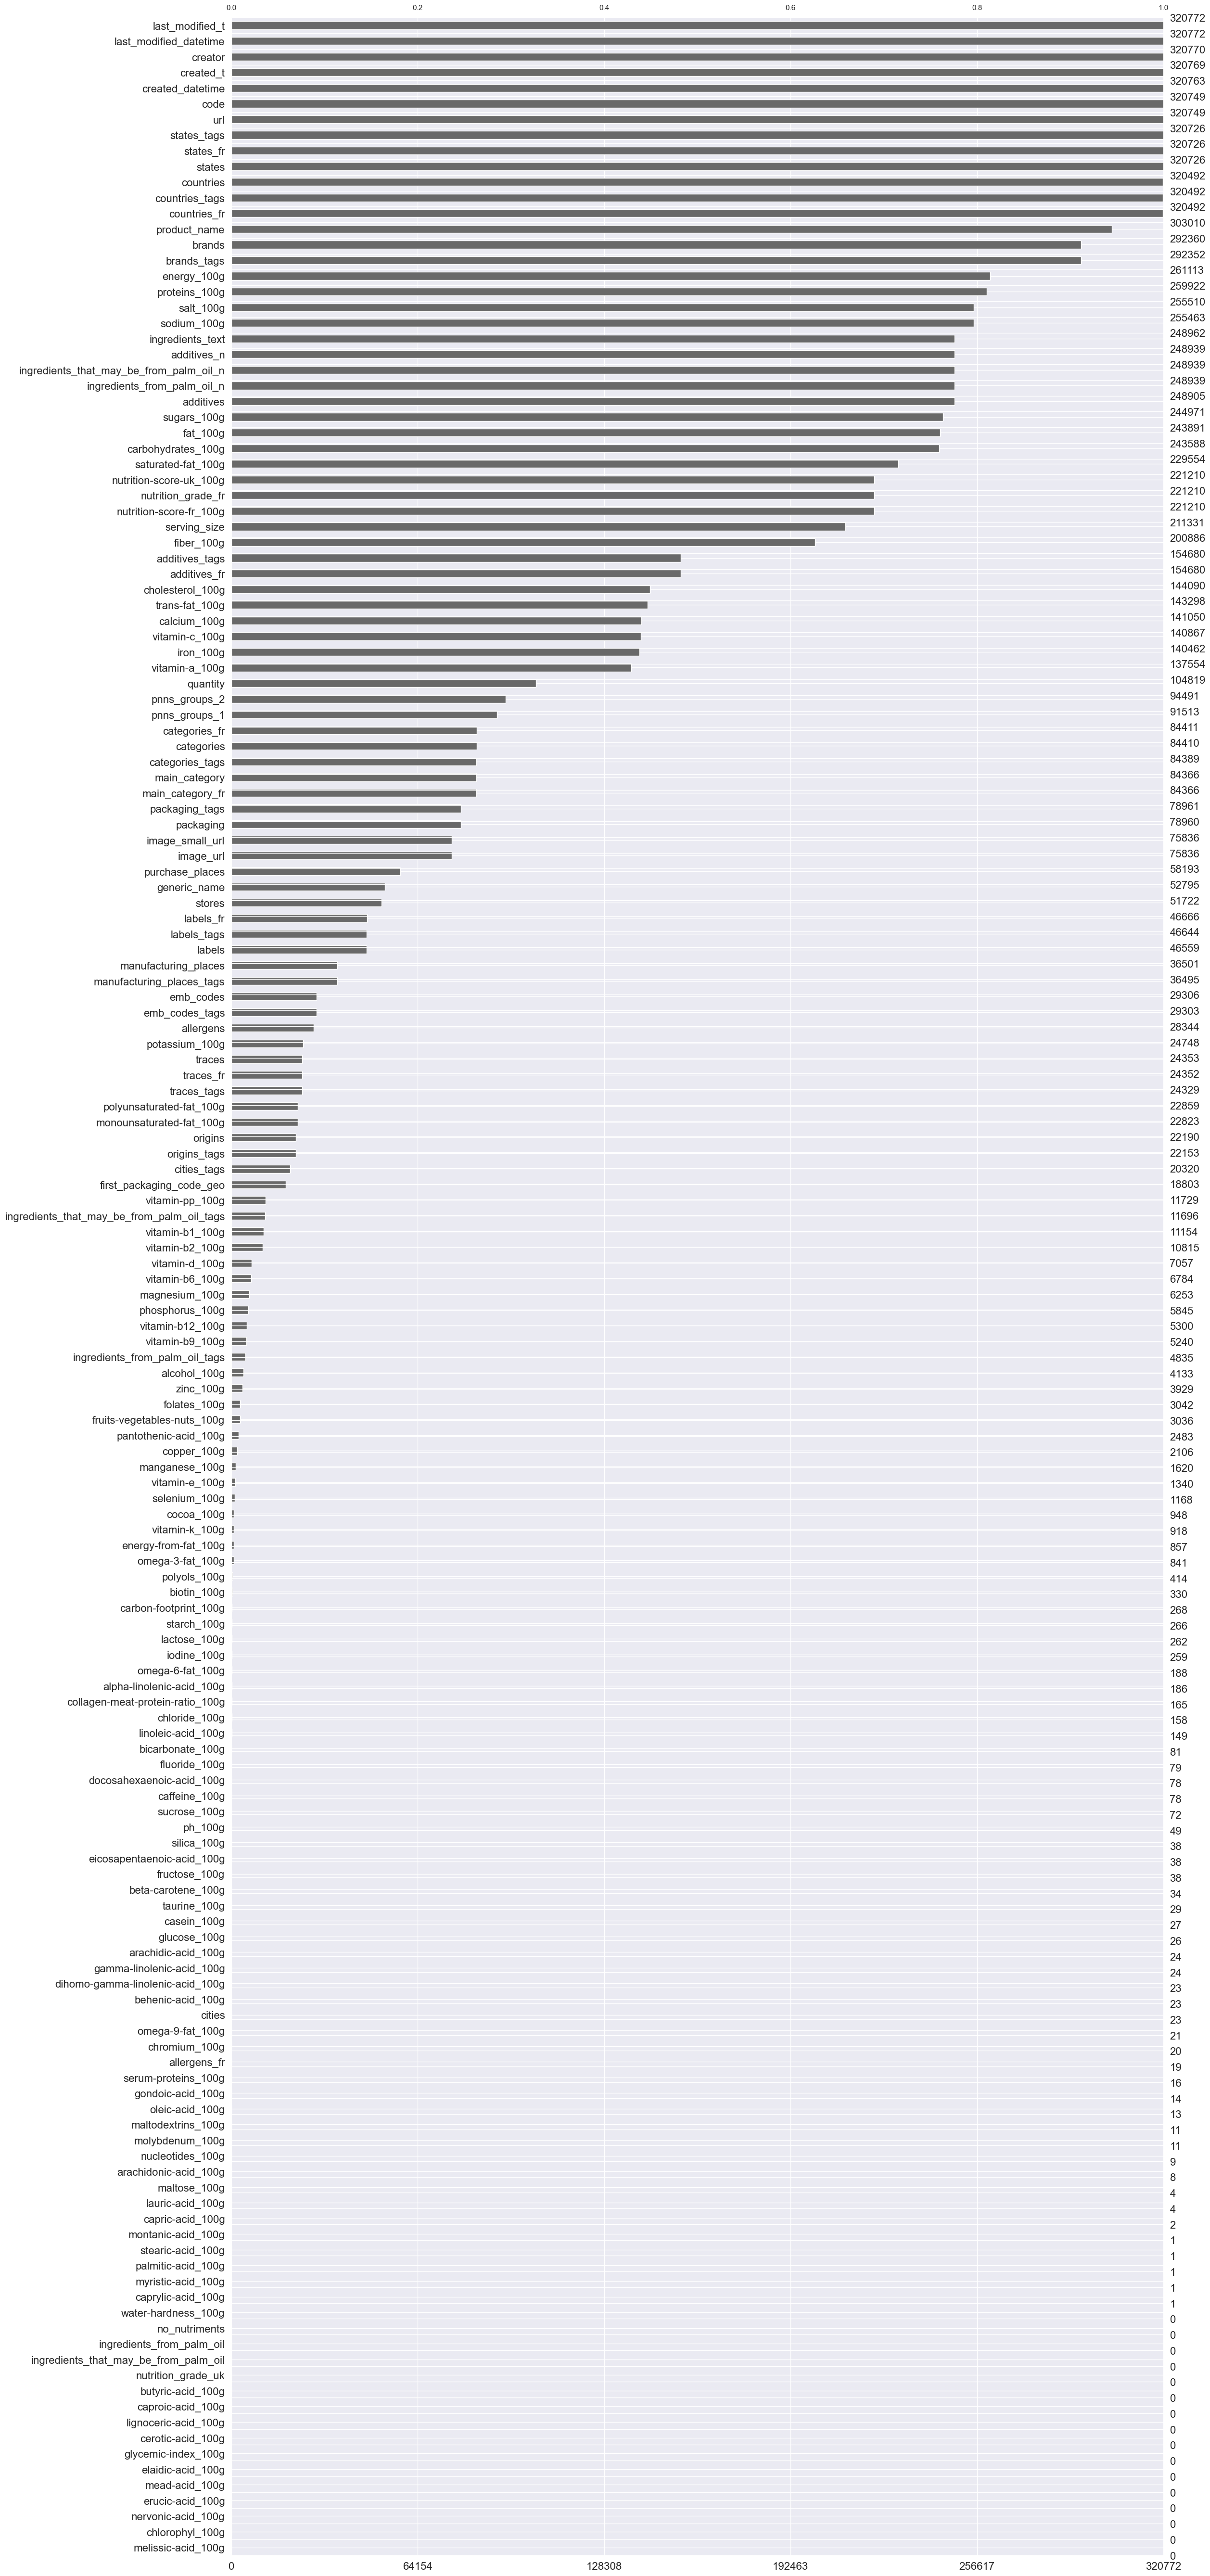

In [6]:
msno.bar(data,sort="ascending")

<Axes: >

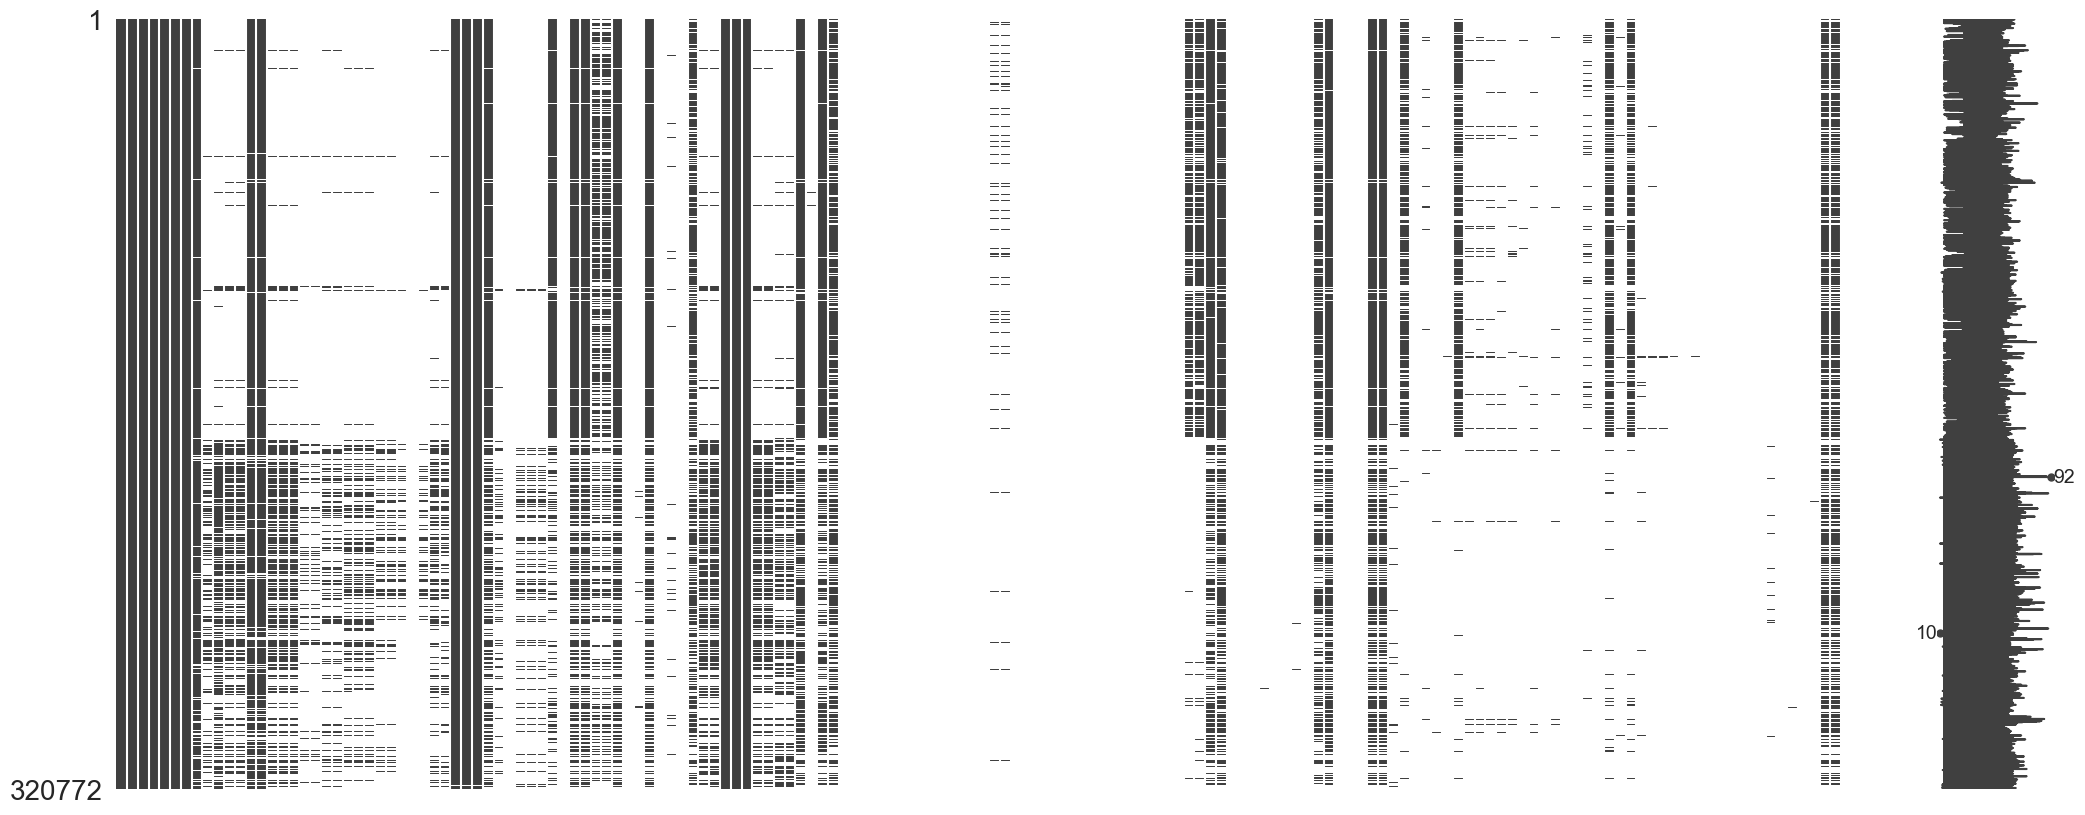

In [7]:
msno.matrix(data)

## <a name="C3">Pourcentage de remplissage des colonnes

In [8]:
mean_null_data = data.isnull().mean().sort_values()
display(mean_null_data)

last_modified_t                          0.000000
last_modified_datetime                   0.000000
creator                                  0.000006
created_t                                0.000009
created_datetime                         0.000028
                                           ...   
ingredients_that_may_be_from_palm_oil    1.000000
ingredients_from_palm_oil                1.000000
no_nutriments                            1.000000
nervonic-acid_100g                       1.000000
water-hardness_100g                      1.000000
Length: 162, dtype: float64

[Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '6.23496e-06'),
 Text(0, 0, '9.35244e-06'),
 Text(0, 0, '2.80573e-05'),
 Text(0, 0, '7.1702e-05'),
 Text(0, 0, '7.1702e-05'),
 Text(0, 0, '0.000143404'),
 Text(0, 0, '0.000143404'),
 Text(0, 0, '0.000143404'),
 Text(0, 0, '0.000872894'),
 Text(0, 0, '0.000872894'),
 Text(0, 0, '0.000872894'),
 Text(0, 0, '0.0553727'),
 Text(0, 0, '0.0885738'),
 Text(0, 0, '0.0885988'),
 Text(0, 0, '0.185986'),
 Text(0, 0, '0.189699'),
 Text(0, 0, '0.203453'),
 Text(0, 0, '0.203599'),
 Text(0, 0, '0.223866'),
 Text(0, 0, '0.223938'),
 Text(0, 0, '0.223938'),
 Text(0, 0, '0.223938'),
 Text(0, 0, '0.224044'),
 Text(0, 0, '0.236308'),
 Text(0, 0, '0.239675'),
 Text(0, 0, '0.24062'),
 Text(0, 0, '0.28437'),
 Text(0, 0, '0.310382'),
 Text(0, 0, '0.310382'),
 Text(0, 0, '0.310382'),
 Text(0, 0, '0.34118'),
 Text(0, 0, '0.373742'),
 Text(0, 0, '0.517788'),
 Text(0, 0, '0.517788'),
 Text(0, 0, '0.550802'),
 Text(0, 0, '0.553271'),
 Text(0, 0, '0.56028'),
 Text(0, 

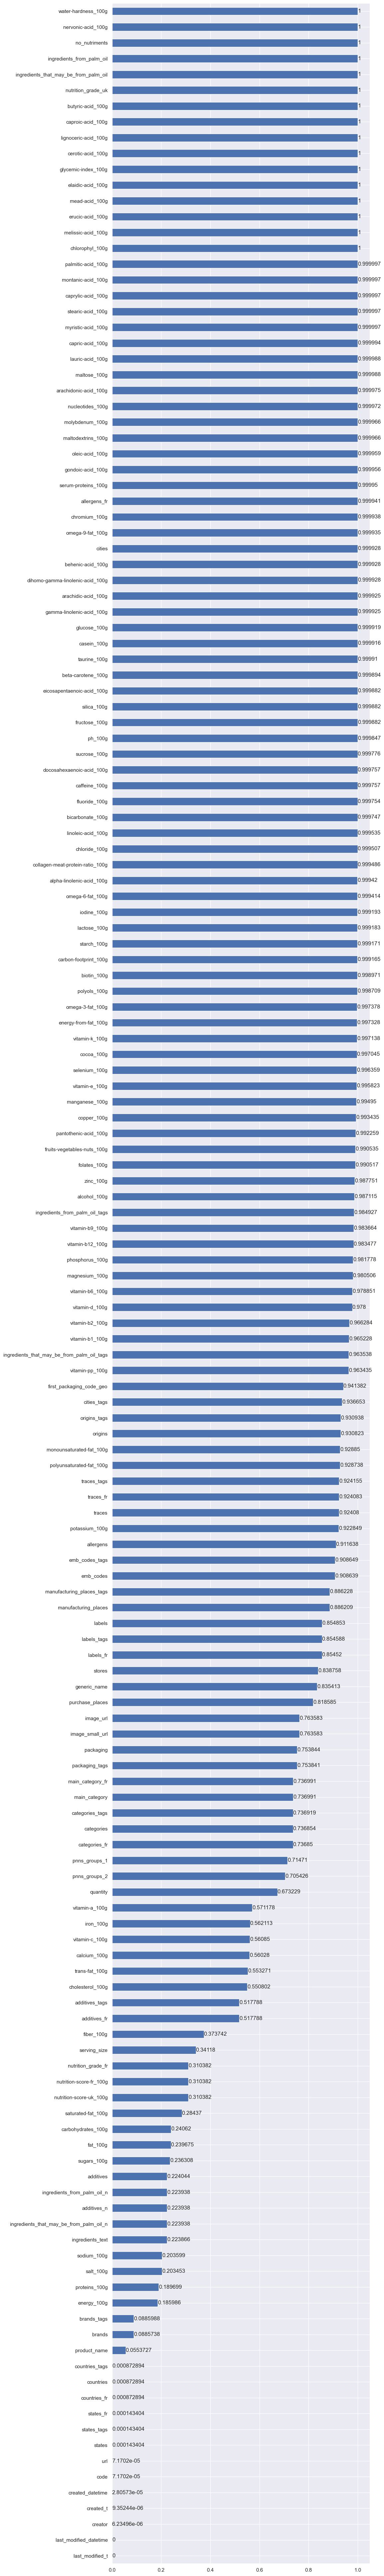

In [9]:

fig = mean_null_data.plot.barh(figsize=(10,100))
fig.bar_label(fig.containers[0])


Conservation des colonnes qui ont plus de 50% de taux de remplissages et qui sont pertinentes par rapport au sujet

In [10]:
data_isolated = data[["code","countries_fr", "product_name", "brands", "energy_100g", "salt_100g", "sodium_100g", "fiber_100g","additives_n", "sugars_100g", "fat_100g","saturated-fat_100g","nutrition-score-uk_100g","nutrition-score-fr_100g", "nutrition_grade_fr", "cholesterol_100g"]]
data_isolated = data_isolated.rename(columns={"saturated-fat_100g": "saturated_fat_100g", "nutrition-score-uk_100g": "nutrition_score_uk_100g", "nutrition-score-fr_100g": "nutrition_score_fr_100g"})
display(data_isolated.head(5))

code countries_fr                    product_name  \
0  0000000003087       France              Farine de blé noir   
1  0000000004530   États-Unis  Banana Chips Sweetened (Whole)   
2  0000000004559   États-Unis                         Peanuts   
3  0000000016087   États-Unis          Organic Salted Nut Mix   
4  0000000016094   États-Unis                 Organic Polenta   

            brands  energy_100g  salt_100g  sodium_100g  fiber_100g  \
0  Ferme t'y R'nao          NaN        NaN          NaN         NaN   
1              NaN       2243.0    0.00000        0.000         3.6   
2   Torn & Glasser       1941.0    0.63500        0.250         7.1   
3        Grizzlies       2540.0    1.22428        0.482         7.1   
4   Bob's Red Mill       1552.0        NaN          NaN         5.7   

   additives_n  sugars_100g  fat_100g  saturated_fat_100g  \
0          NaN          NaN       NaN                 NaN   
1          0.0        14.29     28.57               28.57   
2          0.0        17.86     17.86                0.00   
3          0.0         3.57     57.14                5.36   
4          0.0          NaN      1.43                 NaN   

   nutrition_score_uk_100g  nutrition_score_fr_100g nutrition_grade_fr  \
0                      NaN                      NaN                NaN   
1                     14.0                     14.0                  d   
2                      0.0                      0.0                  b   
3                     12.0                     12.0                  d   
4                      NaN                      NaN                NaN   

   cholesterol_100g  
0               NaN  
1             0.018  
2             0.000  
3               NaN  
4               NaN

## <a name="C4">Changer le type de certaines colonnes a category

In [11]:
data_isolated.dtypes

code                        object
countries_fr                object
product_name                object
brands                      object
energy_100g                float64
salt_100g                  float64
sodium_100g                float64
fiber_100g                 float64
additives_n                float64
sugars_100g                float64
fat_100g                   float64
saturated_fat_100g         float64
nutrition_score_uk_100g    float64
nutrition_score_fr_100g    float64
nutrition_grade_fr          object
cholesterol_100g           float64
dtype: object

In [12]:
data_cat = data_isolated.astype({"nutrition_grade_fr": 'category', "countries_fr": 'category', "brands": 'category'})

In [13]:
data_cat.dtypes

code                         object
countries_fr               category
product_name                 object
brands                     category
energy_100g                 float64
salt_100g                   float64
sodium_100g                 float64
fiber_100g                  float64
additives_n                 float64
sugars_100g                 float64
fat_100g                    float64
saturated_fat_100g          float64
nutrition_score_uk_100g     float64
nutrition_score_fr_100g     float64
nutrition_grade_fr         category
cholesterol_100g            float64
dtype: object

## <a name="C5">Etat des données avant le nettoyage

In [14]:
data_cat.head()

code countries_fr                    product_name  \
0  0000000003087       France              Farine de blé noir   
1  0000000004530   États-Unis  Banana Chips Sweetened (Whole)   
2  0000000004559   États-Unis                         Peanuts   
3  0000000016087   États-Unis          Organic Salted Nut Mix   
4  0000000016094   États-Unis                 Organic Polenta   

            brands  energy_100g  salt_100g  sodium_100g  fiber_100g  \
0  Ferme t'y R'nao          NaN        NaN          NaN         NaN   
1              NaN       2243.0    0.00000        0.000         3.6   
2   Torn & Glasser       1941.0    0.63500        0.250         7.1   
3        Grizzlies       2540.0    1.22428        0.482         7.1   
4   Bob's Red Mill       1552.0        NaN          NaN         5.7   

   additives_n  sugars_100g  fat_100g  saturated_fat_100g  \
0          NaN          NaN       NaN                 NaN   
1          0.0        14.29     28.57               28.57   
2          0.0        17.86     17.86                0.00   
3          0.0         3.57     57.14                5.36   
4          0.0          NaN      1.43                 NaN   

   nutrition_score_uk_100g  nutrition_score_fr_100g nutrition_grade_fr  \
0                      NaN                      NaN                NaN   
1                     14.0                     14.0                  d   
2                      0.0                      0.0                  b   
3                     12.0                     12.0                  d   
4                      NaN                      NaN                NaN   

   cholesterol_100g  
0               NaN  
1             0.018  
2             0.000  
3               NaN  
4               NaN

C:\Users\misss\anaconda3\envs\notebook\Lib\site-packages\ydata_profiling\utils\dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\misss\anaconda3\envs\notebook\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
C:\Users\misss\anaconda3\envs\notebook\Lib\site-packages\ydata_profiling\model\missing.py:78: UserWarning: There was an attempt to generate the Heatmap missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Heatmap": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: '--'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

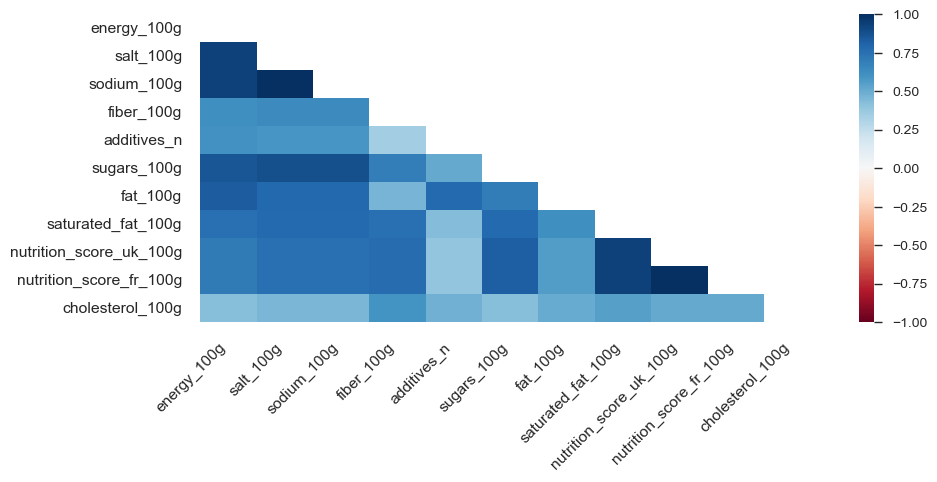

In [15]:
df_profile = data_cat[[ "energy_100g", "salt_100g","sodium_100g", "fiber_100g","additives_n", "sugars_100g", "fat_100g","saturated_fat_100g","nutrition_score_uk_100g","nutrition_score_fr_100g", "cholesterol_100g"]]
profile = ProfileReport(df_profile, title="Profiling Report", infer_dtypes=False , html={'style': {'full_width': True}},correlations={
        "pearson": {"calculate": True},
        "spearman": {"calculate": True},
        "kendall": {"calculate": True},
        "cramers": {"calculate": True},
        "phi_k": {"calculate": True},
    },)
profile.to_file("before_cleaning_numeric.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\misss\anaconda3\envs\notebook\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'd'')
  warnings.warn(
C:\Users\misss\anaconda3\envs\notebook\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
C:\Users\misss\anaconda3\envs\notebook\Lib\site-packages\ydata_profiling\model\missing.py:78: UserWarning: There was an attempt to generate the Heatmap missing values diagrams, but this failed.
To hide this warning, disable the calcu

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

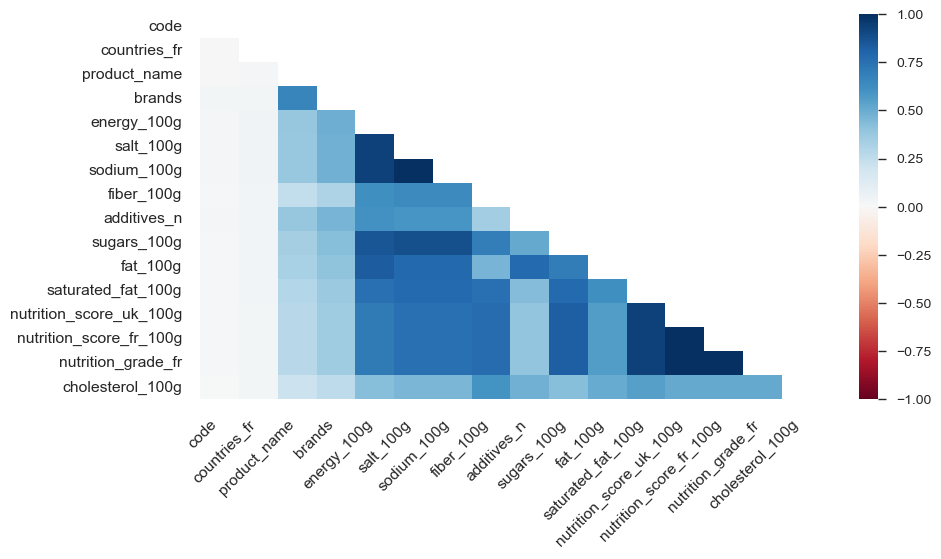

In [16]:
profile = ProfileReport(data_cat, title="Profiling Report", infer_dtypes=False , html={'style': {'full_width': True}})
profile.to_file("before_cleaning_all.html")

# Nettoyage

Valeurs manquantes dans les colonnes conservées

<Axes: >

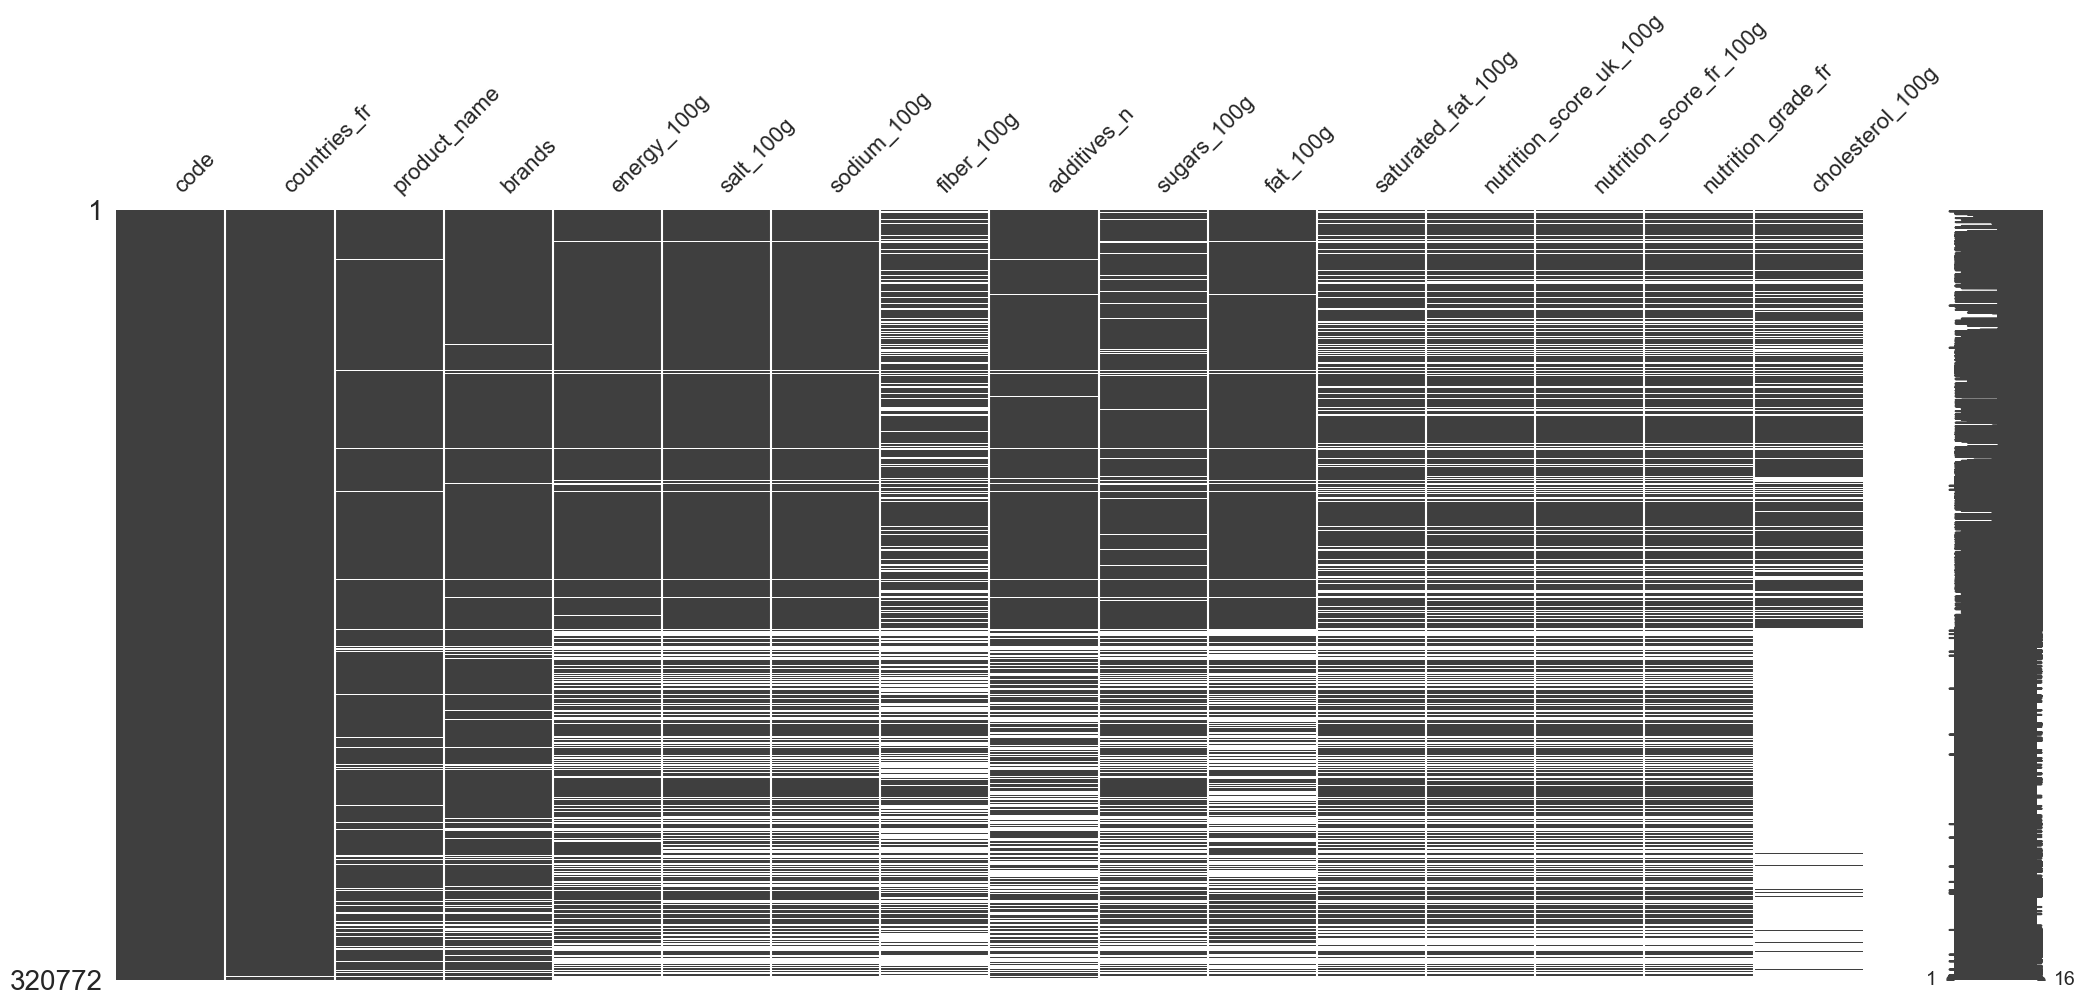

In [17]:
msno.matrix(data_cat)

<Axes: >

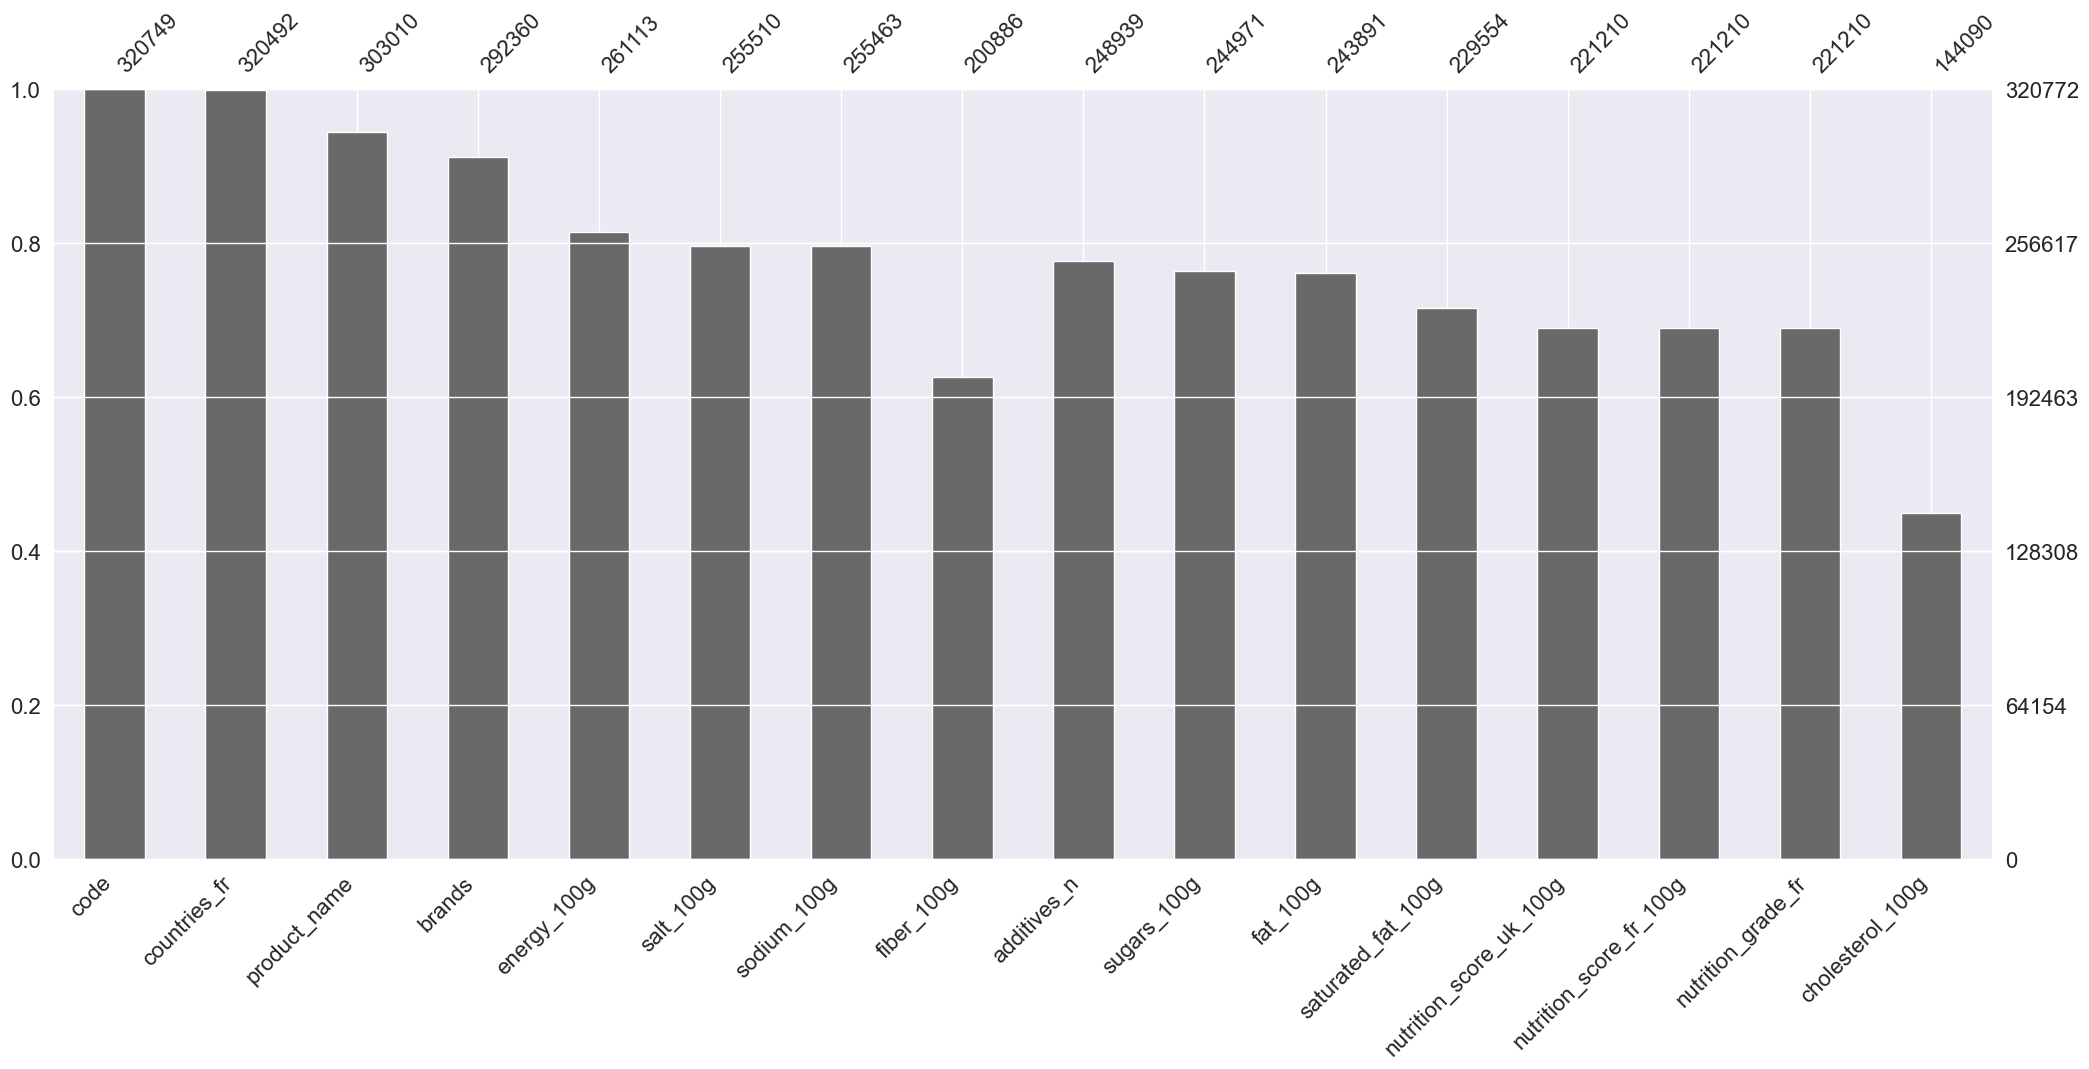

In [18]:
msno.bar(data_cat)

## <a name="C6">Remplacer les outliers des nutriments

In [19]:
data_cat.describe(include='all')

code countries_fr product_name     brands   energy_100g  \
count          320749       320492       303010     292360  2.611130e+05   
unique         320749          722       221347      58784           NaN   
top     0000000003087   États-Unis    Ice Cream  Carrefour           NaN   
freq                1       172998          410       2978           NaN   
mean              NaN          NaN          NaN        NaN  1.141915e+03   
std               NaN          NaN          NaN        NaN  6.447154e+03   
min               NaN          NaN          NaN        NaN  0.000000e+00   
25%               NaN          NaN          NaN        NaN  3.770000e+02   
50%               NaN          NaN          NaN        NaN  1.100000e+03   
75%               NaN          NaN          NaN        NaN  1.674000e+03   
max               NaN          NaN          NaN        NaN  3.251373e+06   

            salt_100g    sodium_100g     fiber_100g    additives_n  \
count   255510.000000  255463.000000  200886.000000  248939.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         2.028624       0.798815       2.862111       1.936024   
std        128.269454      50.504428      12.867578       2.502019   
min          0.000000       0.000000      -6.700000       0.000000   
25%          0.063500       0.025000       0.000000       0.000000   
50%          0.581660       0.229000       1.500000       1.000000   
75%          1.374140       0.541000       3.600000       3.000000   
max      64312.800000   25320.000000    5380.000000      31.000000   

          sugars_100g       fat_100g  saturated_fat_100g  \
count   244971.000000  243891.000000       229554.000000   
unique            NaN            NaN                 NaN   
top               NaN            NaN                 NaN   
freq              NaN            NaN                 NaN   
mean        16.003484      12.730379            5.129932   
std         22.327284      17.578747            8.014238   
min        -17.860000       0.000000            0.000000   
25%          1.300000       0.000000            0.000000   
50%          5.710000       5.000000            1.790000   
75%         24.000000      20.000000            7.140000   
max       3520.000000     714.290000          550.000000   

        nutrition_score_uk_100g  nutrition_score_fr_100g nutrition_grade_fr  \
count             221210.000000            221210.000000             221210   
unique                      NaN                      NaN                  5   
top                         NaN                      NaN                  d   
freq                        NaN                      NaN              62763   
mean                   9.058049                 9.165535                NaN   
std                    9.183589                 9.055903                NaN   
min                  -15.000000               -15.000000                NaN   
25%                    1.000000                 1.000000                NaN   
50%                    9.000000                10.000000                NaN   
75%                   16.000000                16.000000                NaN   
max                   40.000000                40.000000                NaN   

        cholesterol_100g  
count      144090.000000  
unique               NaN  
top                  NaN  
freq                 NaN  
mean            0.020071  
std             0.358062  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.020000  
max            95.238000

Les valeurs des nutriscores negatives sont logiques: un nutriscore peut aller de -15 a 40.
D'aprés certains articles, la valeur energetique maximum pour un aliment pour 100g est de 900 kcal soit 3700kj.
Ici on remplace les outliers des colonnes des nutriments par la moyenne des nutriments du nutrigrade auquels ils appartiennent. Si ils n'ont pas de nutrigrade, c'est remplacer par la moyenne de tous.
On remplace également les NaN par 0.

In [20]:
composant_list=["fiber_100g", "sugars_100g", "fat_100g","saturated_fat_100g", "cholesterol_100g", "salt_100g","sodium_100g", "energy_100g"]
nutrigrade_list = data_cat['nutrition_grade_fr'].unique()

for composant in composant_list:
    mask = (data_cat[composant] < 0) | (data_cat[composant] > 100)
    if(composant == "energy_100g"):
        mask = (data_cat[composant] < 0) | (data_cat[composant] > 3700)
    column_mean = data_cat[composant].mean()
    data_cat[composant] = data_cat[composant].fillna(0)
    for nutrigrade in nutrigrade_list:
        nutri_mean = data_cat.loc[data_cat['nutrition_grade_fr'] == nutrigrade, composant].mean()
        if(pd.isna(nutrigrade)):
            data_cat.loc[(mask), composant] = column_mean
        else :
            data_cat.loc[(mask) & (data_cat['nutrition_grade_fr'] == nutrigrade), composant] = nutri_mean



<Axes: >

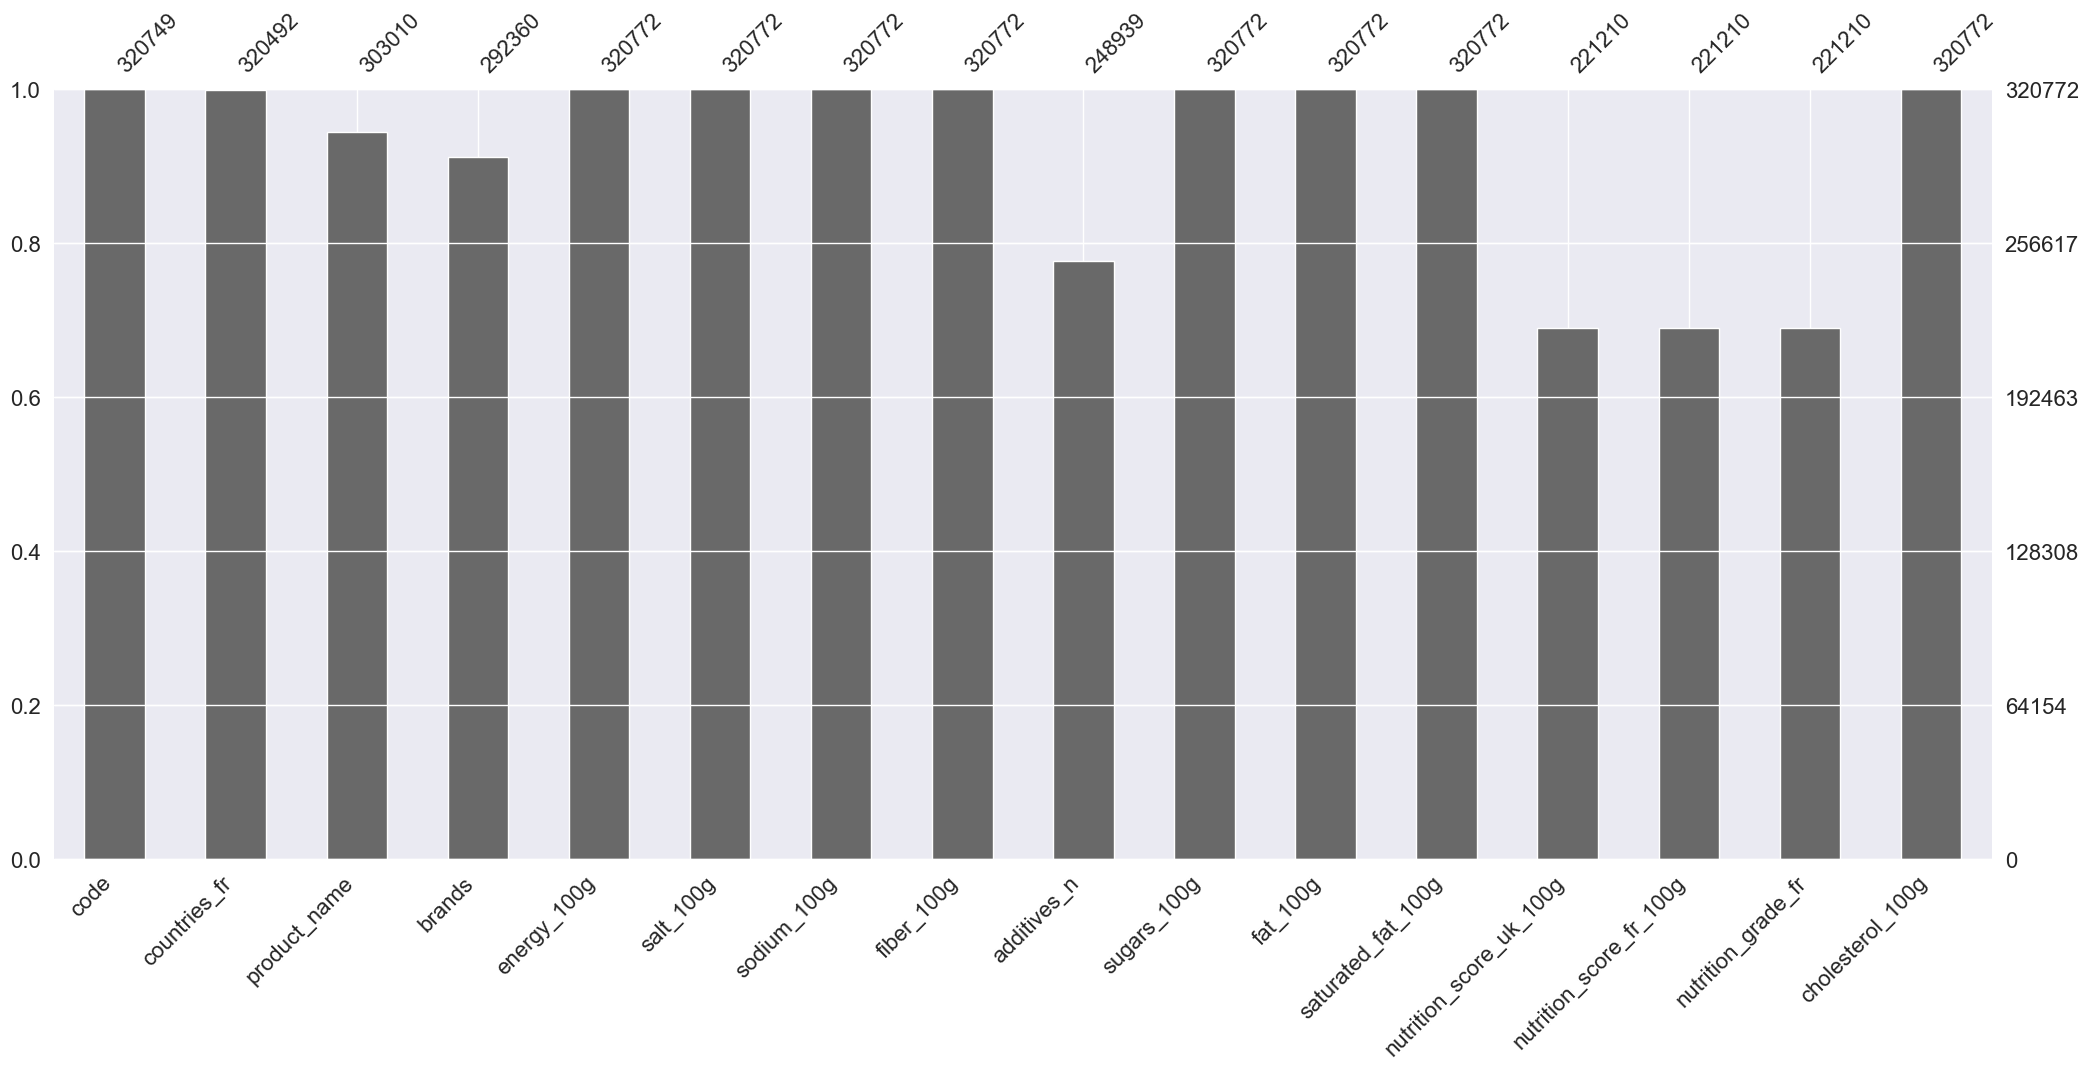

In [21]:
msno.bar(data_cat)

## <a name="C7">Remplacement des NaN des additifs

Comme 0 est deja une indication qu'il n'y a pas d'additifs, j'ai remplacé les NaN par -1.

In [22]:
data_cat

code countries_fr  \
0       0000000003087       France   
1       0000000004530   États-Unis   
2       0000000004559   États-Unis   
3       0000000016087   États-Unis   
4       0000000016094   États-Unis   
...               ...          ...   
320767  9948282780603     Roumanie   
320768       99567453   États-Unis   
320769  9970229501521        Chine   
320770  9980282863788       France   
320771   999990026839   États-Unis   

                                             product_name           brands  \
0                                      Farine de blé noir  Ferme t'y R'nao   
1                          Banana Chips Sweetened (Whole)              NaN   
2                                                 Peanuts   Torn & Glasser   
3                                  Organic Salted Nut Mix        Grizzlies   
4                                         Organic Polenta   Bob's Red Mill   
...                                                   ...              ...   
320767                                  Tomato & ricotta          Panzani    
320768  Mint Melange Tea A Blend Of Peppermint, Lemon ...     Trader Joe's   
320769                                            乐吧泡菜味薯片               乐吧   
320770                           Tomates aux Vermicelles             Knorr   
320771                    Sugar Free Drink Mix, Peach Tea    Market Pantry   

        energy_100g  salt_100g  sodium_100g  fiber_100g  additives_n  \
0               0.0    0.00000        0.000         0.0          NaN   
1            2243.0    0.00000        0.000         3.6          0.0   
2            1941.0    0.63500        0.250         7.1          0.0   
3            2540.0    1.22428        0.482         7.1          0.0   
4            1552.0    0.00000        0.000         5.7          0.0   
...             ...        ...          ...         ...          ...   
320767          0.0    0.00000        0.000         0.0          NaN   
320768          0.0    0.00000        0.000         0.0          0.0   
320769          0.0    0.00000        0.000         0.0          NaN   
320770          0.0    0.00000        0.000         0.0          NaN   
320771       2092.0    0.00000        0.000         0.0          7.0   

        sugars_100g  fat_100g  saturated_fat_100g  nutrition_score_uk_100g  \
0              0.00      0.00                0.00                      NaN   
1             14.29     28.57               28.57                     14.0   
2             17.86     17.86                0.00                      0.0   
3              3.57     57.14                5.36                     12.0   
4              0.00      1.43                0.00                      NaN   
...             ...       ...                 ...                      ...   
320767         0.00      0.00                0.00                      NaN   
320768         0.00      0.00                0.00                      0.0   
320769         0.00      0.00                0.00                      NaN   
320770         0.00      0.00                0.00                      NaN   
320771         0.00      0.00                0.00                      NaN   

        nutrition_score_fr_100g nutrition_grade_fr  cholesterol_100g  
0                           NaN                NaN             0.000  
1                          14.0                  d             0.018  
2                           0.0                  b             0.000  
3                          12.0                  d             0.000  
4                           NaN                NaN             0.000  
...                         ...                ...               ...  
320767                      NaN                NaN             0.000  
320768                      0.0                  b             0.000  
320769                      NaN                NaN             0.000  
320770                      NaN                NaN             0.000  
320771                      NaN         

<Axes: >

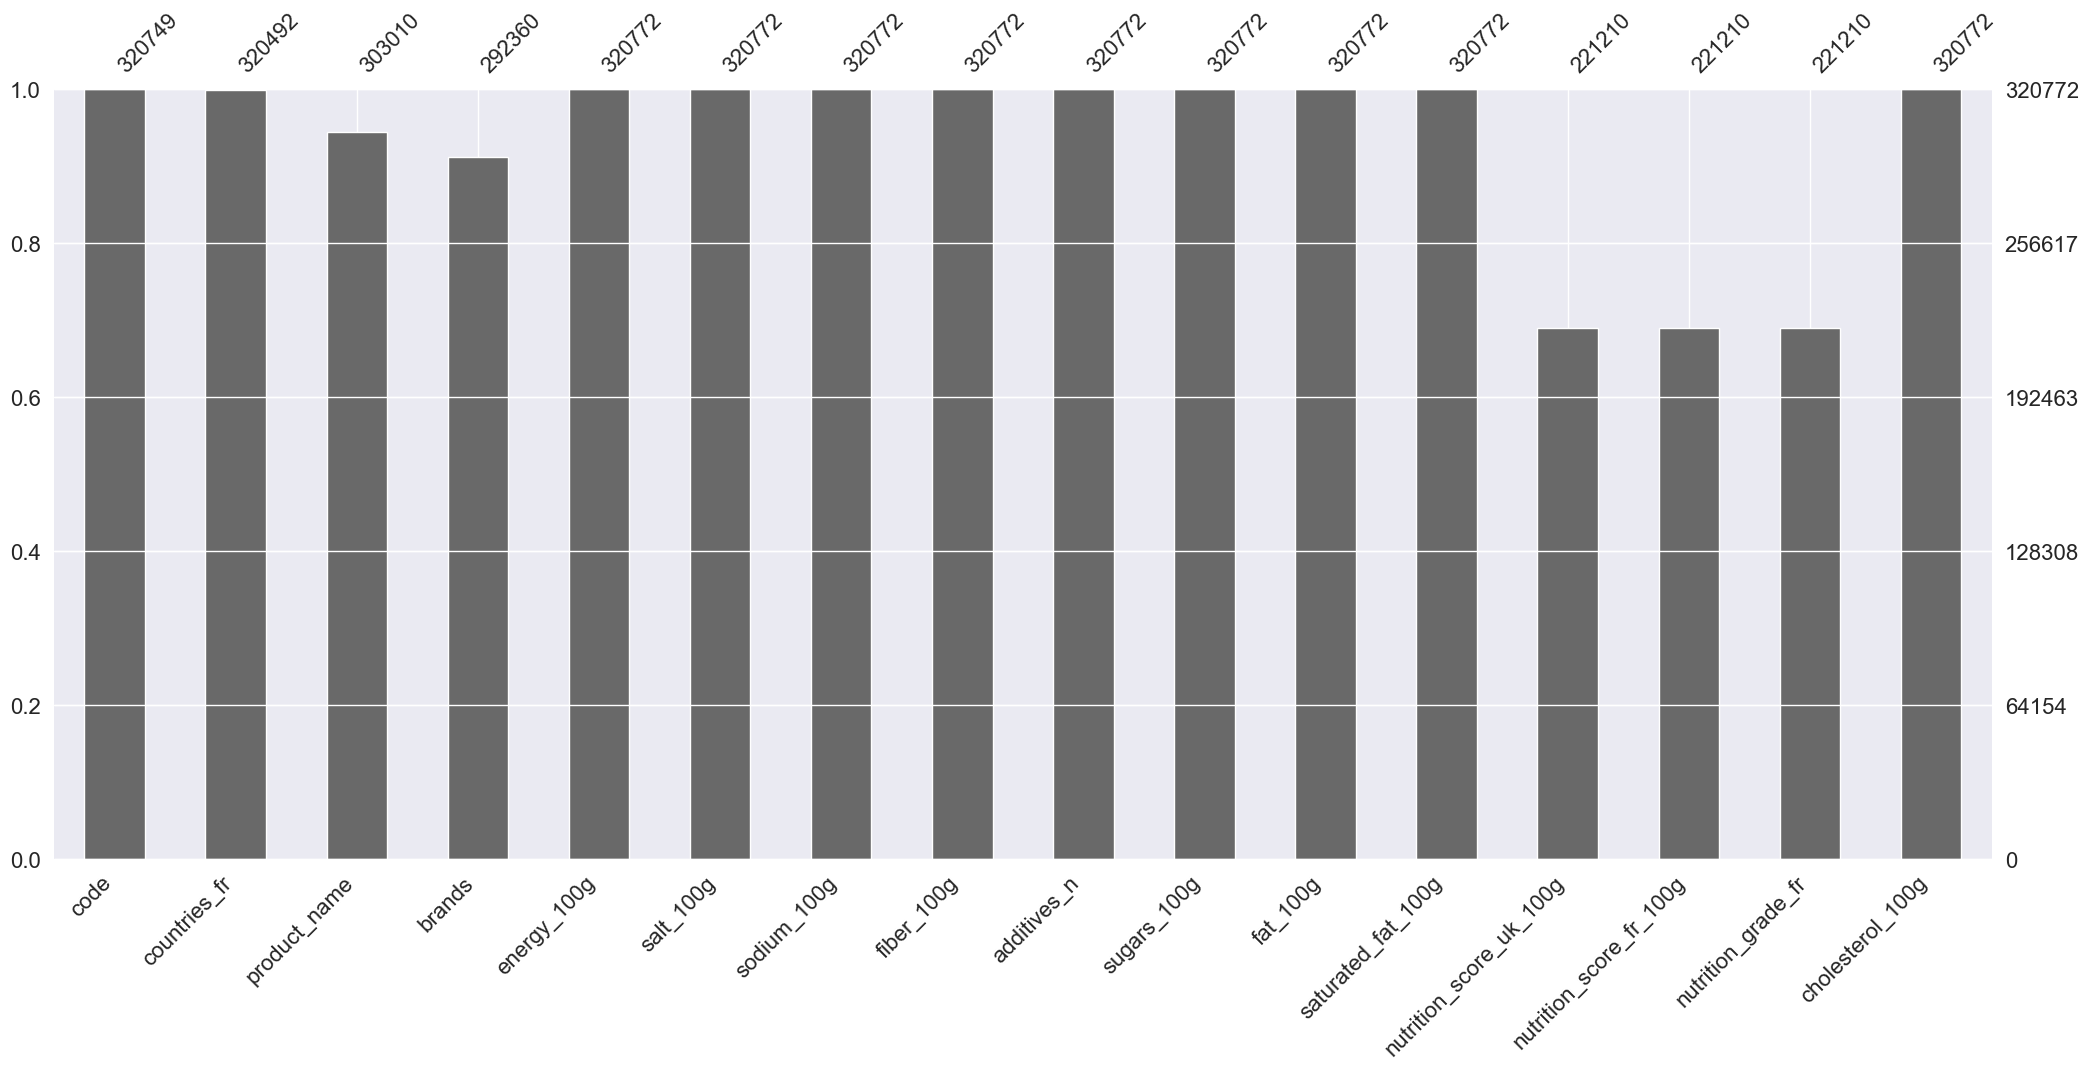

In [23]:
data_cat['additives_n'] = data_cat['additives_n'].fillna(-1)
msno.bar(data_cat)

## <a name="C8">Supression des individus qui ne possedent aucun nutriments


In [24]:
mask = ((data_cat["energy_100g"]==0) 
    & (data_cat["salt_100g"]==0)
    & (data_cat["sodium_100g"]==0)
    & (data_cat["fiber_100g"]==0)
    & (data_cat["fat_100g"]==0)
    & (data_cat["fat_100g"]==0)
    & (data_cat["saturated_fat_100g"]==0)
    & (data_cat["cholesterol_100g"]==0)
   )
data_cat.loc[mask,:]


code countries_fr  \
0       0000000003087       France   
46      0000000024600       France   
48      0000000027205       France   
136     0000000039259       France   
177     0000001071894  Royaume-Uni   
...               ...          ...   
320766       99410148  Royaume-Uni   
320767  9948282780603     Roumanie   
320768       99567453   États-Unis   
320769  9970229501521        Chine   
320770  9980282863788       France   

                                             product_name           brands  \
0                                      Farine de blé noir  Ferme t'y R'nao   
46                                          Filet de bœuf              NaN   
48                                                    NaN              NaN   
136                                               Twix x2              NaN   
177                                                 Flute         Waitrose   
...                                                   ...              ...   
320766                                                NaN              NaN   
320767                                  Tomato & ricotta          Panzani    
320768  Mint Melange Tea A Blend Of Peppermint, Lemon ...     Trader Joe's   
320769                                            乐吧泡菜味薯片               乐吧   
320770                           Tomates aux Vermicelles             Knorr   

        energy_100g  salt_100g  sodium_100g  fiber_100g  additives_n  \
0               0.0        0.0          0.0         0.0         -1.0   
46              0.0        0.0          0.0         0.0         -1.0   
48              0.0        0.0          0.0         0.0         -1.0   
136             0.0        0.0          0.0         0.0         -1.0   
177             0.0        0.0          0.0         0.0          0.0   
...             ...        ...          ...         ...          ...   
320766          0.0        0.0          0.0         0.0         -1.0   
320767          0.0        0.0          0.0         0.0         -1.0   
320768          0.0        0.0          0.0         0.0          0.0   
320769          0.0        0.0          0.0         0.0         -1.0   
320770          0.0        0.0          0.0         0.0         -1.0   

        sugars_100g  fat_100g  saturated_fat_100g  nutrition_score_uk_100g  \
0               0.0       0.0                 0.0                      NaN   
46              0.0       0.0                 0.0                      NaN   
48              0.0       0.0                 0.0                      NaN   
136             0.0       0.0                 0.0                      NaN   
177             0.0       0.0                 0.0                      NaN   
...             ...       ...                 ...                      ...   
320766          0.0       0.0                 0.0                      NaN   
320767          0.0       0.0                 0.0                      NaN   
320768          0.0       0.0                 0.0                      0.0   
320769          0.0       0.0                 0.0                      NaN   
320770          0.0       0.0                 0.0                      NaN   

        nutrition_score_fr_100g nutrition_grade_fr  cholesterol_100g  
0                           NaN                NaN               0.0  
46                          NaN                NaN               0.0  
48                          NaN                NaN               0.0  
136                         NaN                NaN               0.0  
177                         NaN                NaN               0.0  
...                         ...                ...               ...  
320766                      NaN                NaN               0.0  
320767                      NaN                NaN               0.0  
320768                      0.0                  b               0.0  
320769                      NaN                NaN               0.0  
320770                      NaN         

In [25]:
data_cat.drop(data_cat[mask].index, inplace = True)
data_cat

code countries_fr                         product_name  \
1       0000000004530   États-Unis       Banana Chips Sweetened (Whole)   
2       0000000004559   États-Unis                              Peanuts   
3       0000000016087   États-Unis               Organic Salted Nut Mix   
4       0000000016094   États-Unis                      Organic Polenta   
5       0000000016100   États-Unis    Breadshop Honey Gone Nuts Granola   
...               ...          ...                                  ...   
320751  9847548283004       France  Tartines craquantes bio au sarrasin   
320756         989898       Suisse                          Test NF App   
320757  9900000000233       France                              Amandes   
320763       99111250       France                   Thé vert Earl grey   
320771   999990026839   États-Unis      Sugar Free Drink Mix, Peach Tea   

                    brands  energy_100g  salt_100g  sodium_100g  fiber_100g  \
1                      NaN       2243.0    0.00000     0.000000         3.6   
2           Torn & Glasser       1941.0    0.63500     0.250000         7.1   
3                Grizzlies       2540.0    1.22428     0.482000         7.1   
4           Bob's Red Mill       1552.0    0.00000     0.000000         5.7   
5                     Unfi       1933.0    0.00000     0.000000         7.7   
...                    ...          ...        ...          ...         ...   
320751  Le Pain des fleurs       1643.0    0.68000     0.267717         5.9   
320756                 NaN        569.0    1.10000     0.433071         1.1   
320757              Biosic       2406.0    0.10000     0.039370        12.2   
320763             Lobodis         21.0    0.02540     0.010000         0.2   
320771       Market Pantry       2092.0    0.00000     0.000000         0.0   

        additives_n  sugars_100g  fat_100g  saturated_fat_100g  \
1               0.0        14.29     28.57               28.57   
2               0.0        17.86     17.86                0.00   
3               0.0         3.57     57.14                5.36   
4               0.0         0.00      1.43                0.00   
5               0.0        11.54     18.27                1.92   
...             ...          ...       ...                 ...   
320751         -1.0         2.60      2.80                0.60   
320756          0.0         9.60     31.00                0.00   
320757         -1.0         3.89      0.00                3.73   
320763          0.0         0.50      0.20                0.20   
320771          7.0         0.00      0.00                0.00   

        nutrition_score_uk_100g  nutrition_score_fr_100g nutrition_grade_fr  \
1                          14.0                     14.0                  d   
2                           0.0                      0.0                  b   
3                          12.0                     12.0                  d   
4                           NaN                      NaN                NaN   
5                           NaN                      NaN                NaN   
...                         ...                      ...                ...   
320751                     -4.0                     -4.0                  a   
320756                      NaN                      NaN                NaN   
320757                      0.0                      0.0                  b   
320763                      0.0                      2.0                  c   
320771                      NaN                      NaN                NaN   

        cholesterol_100g  
1                  0.018  
2                  0.000  
3                  0.000  
4                  0.000  
5                  0.000  
...                  ...  
320751             0.000  
320756             0.000  
320757             0.000  
320763             0.000  
320771             0.000  

[258323 rows x 16 columns]

## <a name="C9">Suppression des colonnes avec un code null

<Axes: >

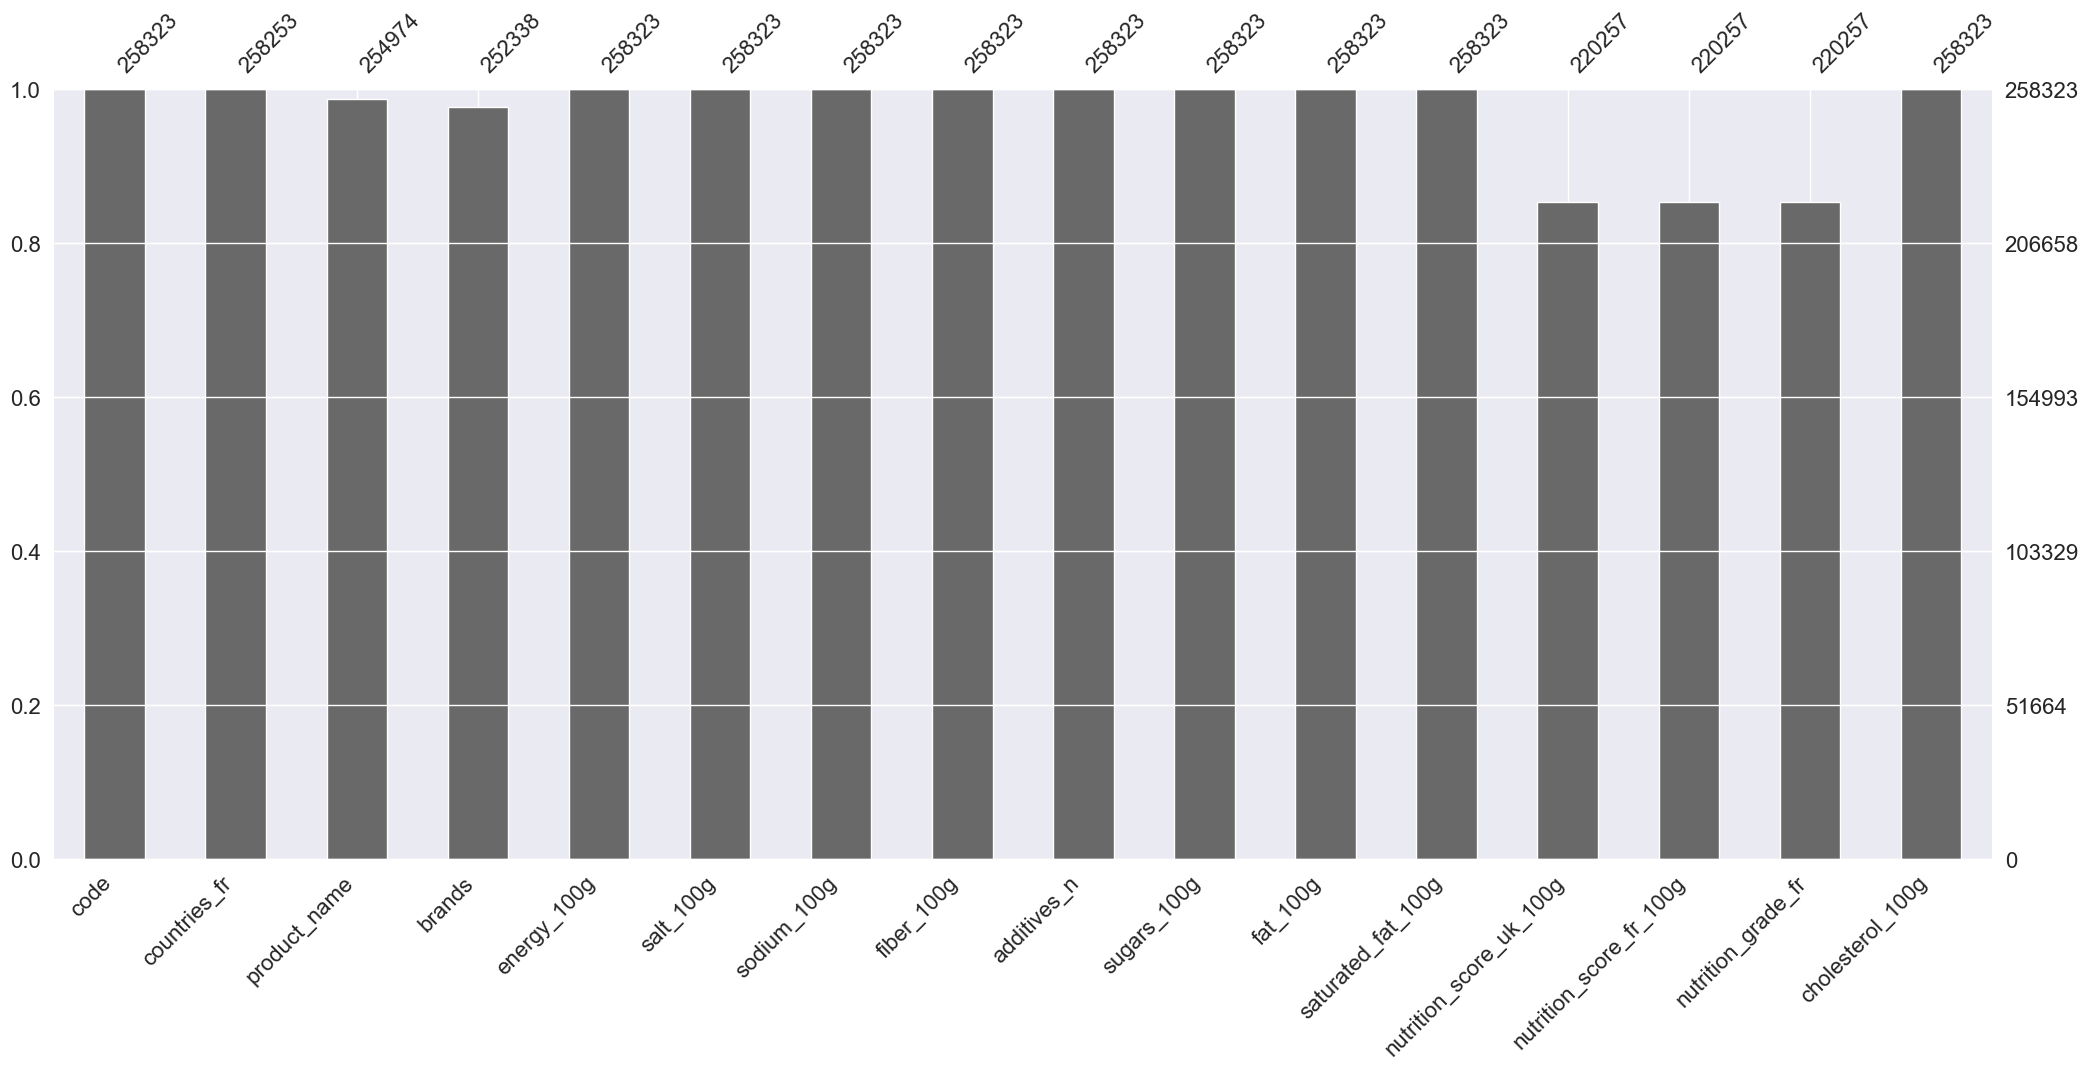

In [26]:
null_rows = data_cat.loc[data_cat['code'].isnull()]
data_cat.dropna(subset=['code'], inplace=True)
msno.bar(data_cat)

## <a name="C10">Completion des nutriscore manquants

In [27]:
data_score  = data_cat[["energy_100g", "salt_100g", "sodium_100g","fiber_100g","additives_n", "sugars_100g", "fat_100g","saturated_fat_100g","nutrition_score_uk_100g","nutrition_score_fr_100g", "cholesterol_100g"]]
data_score

energy_100g  salt_100g  sodium_100g  fiber_100g  additives_n  \
1            2243.0    0.00000     0.000000         3.6          0.0   
2            1941.0    0.63500     0.250000         7.1          0.0   
3            2540.0    1.22428     0.482000         7.1          0.0   
4            1552.0    0.00000     0.000000         5.7          0.0   
5            1933.0    0.00000     0.000000         7.7          0.0   
...             ...        ...          ...         ...          ...   
320751       1643.0    0.68000     0.267717         5.9         -1.0   
320756        569.0    1.10000     0.433071         1.1          0.0   
320757       2406.0    0.10000     0.039370        12.2         -1.0   
320763         21.0    0.02540     0.010000         0.2          0.0   
320771       2092.0    0.00000     0.000000         0.0          7.0   

        sugars_100g  fat_100g  saturated_fat_100g  nutrition_score_uk_100g  \
1             14.29     28.57               28.57                     14.0   
2             17.86     17.86                0.00                      0.0   
3              3.57     57.14                5.36                     12.0   
4              0.00      1.43                0.00                      NaN   
5             11.54     18.27                1.92                      NaN   
...             ...       ...                 ...                      ...   
320751         2.60      2.80                0.60                     -4.0   
320756         9.60     31.00                0.00                      NaN   
320757         3.89      0.00                3.73                      0.0   
320763         0.50      0.20                0.20                      0.0   
320771         0.00      0.00                0.00                      NaN   

        nutrition_score_fr_100g  cholesterol_100g  
1                          14.0             0.018  
2                           0.0             0.000  
3                          12.0             0.000  
4                           NaN             0.000  
5                           NaN             0.000  
...                         ...               ...  
320751                     -4.0             0.000  
320756                      NaN             0.000  
320757                      0.0             0.000  
320763                      2.0             0.000  
320771                      NaN             0.000  

[258323 rows x 11 columns]

In [28]:
imputer = IterativeImputer(max_iter=50,min_value=-15,max_value=40)
imputed = imputer.fit_transform(data_score)
df_imputed = pd.DataFrame(imputed, columns=data_score.columns)

df_imputed

energy_100g  salt_100g  sodium_100g  fiber_100g  additives_n  \
0            2243.0    0.00000     0.000000         3.6          0.0   
1            1941.0    0.63500     0.250000         7.1          0.0   
2            2540.0    1.22428     0.482000         7.1          0.0   
3            1552.0    0.00000     0.000000         5.7          0.0   
4            1933.0    0.00000     0.000000         7.7          0.0   
...             ...        ...          ...         ...          ...   
258318       1643.0    0.68000     0.267717         5.9         -1.0   
258319        569.0    1.10000     0.433071         1.1          0.0   
258320       2406.0    0.10000     0.039370        12.2         -1.0   
258321         21.0    0.02540     0.010000         0.2          0.0   
258322       2092.0    0.00000     0.000000         0.0          7.0   

        sugars_100g  fat_100g  saturated_fat_100g  nutrition_score_uk_100g  \
0             14.29     28.57               28.57                14.000000   
1             17.86     17.86                0.00                 0.000000   
2              3.57     57.14                5.36                12.000000   
3              0.00      1.43                0.00                 5.344733   
4             11.54     18.27                1.92                 8.012207   
...             ...       ...                 ...                      ...   
258318         2.60      2.80                0.60                -4.000000   
258319         9.60     31.00                0.00                 6.661093   
258320         3.89      0.00                3.73                 0.000000   
258321         0.50      0.20                0.20                 0.000000   
258322         0.00      0.00                0.00                 9.748240   

        nutrition_score_fr_100g  cholesterol_100g  
0                     14.000000             0.018  
1                      0.000000             0.000  
2                     12.000000             0.000  
3                      5.323729             0.000  
4                      7.898541             0.000  
...                         ...               ...  
258318                -4.000000             0.000  
258319                 6.888682             0.000  
258320                 0.000000             0.000  
258321                 2.000000             0.000  
258322                 9.501761             0.000  

[258323 rows x 11 columns]

In [29]:
data_cat.reset_index(drop=True, inplace=True)
data_cat

code countries_fr                         product_name  \
0       0000000004530   États-Unis       Banana Chips Sweetened (Whole)   
1       0000000004559   États-Unis                              Peanuts   
2       0000000016087   États-Unis               Organic Salted Nut Mix   
3       0000000016094   États-Unis                      Organic Polenta   
4       0000000016100   États-Unis    Breadshop Honey Gone Nuts Granola   
...               ...          ...                                  ...   
258318  9847548283004       France  Tartines craquantes bio au sarrasin   
258319         989898       Suisse                          Test NF App   
258320  9900000000233       France                              Amandes   
258321       99111250       France                   Thé vert Earl grey   
258322   999990026839   États-Unis      Sugar Free Drink Mix, Peach Tea   

                    brands  energy_100g  salt_100g  sodium_100g  fiber_100g  \
0                      NaN       2243.0    0.00000     0.000000         3.6   
1           Torn & Glasser       1941.0    0.63500     0.250000         7.1   
2                Grizzlies       2540.0    1.22428     0.482000         7.1   
3           Bob's Red Mill       1552.0    0.00000     0.000000         5.7   
4                     Unfi       1933.0    0.00000     0.000000         7.7   
...                    ...          ...        ...          ...         ...   
258318  Le Pain des fleurs       1643.0    0.68000     0.267717         5.9   
258319                 NaN        569.0    1.10000     0.433071         1.1   
258320              Biosic       2406.0    0.10000     0.039370        12.2   
258321             Lobodis         21.0    0.02540     0.010000         0.2   
258322       Market Pantry       2092.0    0.00000     0.000000         0.0   

        additives_n  sugars_100g  fat_100g  saturated_fat_100g  \
0               0.0        14.29     28.57               28.57   
1               0.0        17.86     17.86                0.00   
2               0.0         3.57     57.14                5.36   
3               0.0         0.00      1.43                0.00   
4               0.0        11.54     18.27                1.92   
...             ...          ...       ...                 ...   
258318         -1.0         2.60      2.80                0.60   
258319          0.0         9.60     31.00                0.00   
258320         -1.0         3.89      0.00                3.73   
258321          0.0         0.50      0.20                0.20   
258322          7.0         0.00      0.00                0.00   

        nutrition_score_uk_100g  nutrition_score_fr_100g nutrition_grade_fr  \
0                          14.0                     14.0                  d   
1                           0.0                      0.0                  b   
2                          12.0                     12.0                  d   
3                           NaN                      NaN                NaN   
4                           NaN                      NaN                NaN   
...                         ...                      ...                ...   
258318                     -4.0                     -4.0                  a   
258319                      NaN                      NaN                NaN   
258320                      0.0                      0.0                  b   
258321                      0.0                      2.0                  c   
258322                      NaN                      NaN                NaN   

        cholesterol_100g  
0                  0.018  
1                  0.000  
2                  0.000  
3                  0.000  
4                  0.000  
...                  ...  
258318             0.000  
258319             0.000  
258320             0.000  
258321             0.000  
258322             0.000  

[258323 rows x 16 columns]

In [30]:
data_merged = pd.concat([data_cat[["code","countries_fr", "product_name", "brands","additives_n", "energy_100g" ,"salt_100g", "sodium_100g","fiber_100g", "sugars_100g", "fat_100g","saturated_fat_100g", "cholesterol_100g","nutrition_grade_fr"]], df_imputed[["nutrition_score_uk_100g","nutrition_score_fr_100g"]]], axis=1)
data_merged

code countries_fr                         product_name  \
0       0000000004530   États-Unis       Banana Chips Sweetened (Whole)   
1       0000000004559   États-Unis                              Peanuts   
2       0000000016087   États-Unis               Organic Salted Nut Mix   
3       0000000016094   États-Unis                      Organic Polenta   
4       0000000016100   États-Unis    Breadshop Honey Gone Nuts Granola   
...               ...          ...                                  ...   
258318  9847548283004       France  Tartines craquantes bio au sarrasin   
258319         989898       Suisse                          Test NF App   
258320  9900000000233       France                              Amandes   
258321       99111250       France                   Thé vert Earl grey   
258322   999990026839   États-Unis      Sugar Free Drink Mix, Peach Tea   

                    brands  additives_n  energy_100g  salt_100g  sodium_100g  \
0                      NaN          0.0       2243.0    0.00000     0.000000   
1           Torn & Glasser          0.0       1941.0    0.63500     0.250000   
2                Grizzlies          0.0       2540.0    1.22428     0.482000   
3           Bob's Red Mill          0.0       1552.0    0.00000     0.000000   
4                     Unfi          0.0       1933.0    0.00000     0.000000   
...                    ...          ...          ...        ...          ...   
258318  Le Pain des fleurs         -1.0       1643.0    0.68000     0.267717   
258319                 NaN          0.0        569.0    1.10000     0.433071   
258320              Biosic         -1.0       2406.0    0.10000     0.039370   
258321             Lobodis          0.0         21.0    0.02540     0.010000   
258322       Market Pantry          7.0       2092.0    0.00000     0.000000   

        fiber_100g  sugars_100g  fat_100g  saturated_fat_100g  \
0              3.6        14.29     28.57               28.57   
1              7.1        17.86     17.86                0.00   
2              7.1         3.57     57.14                5.36   
3              5.7         0.00      1.43                0.00   
4              7.7        11.54     18.27                1.92   
...            ...          ...       ...                 ...   
258318         5.9         2.60      2.80                0.60   
258319         1.1         9.60     31.00                0.00   
258320        12.2         3.89      0.00                3.73   
258321         0.2         0.50      0.20                0.20   
258322         0.0         0.00      0.00                0.00   

        cholesterol_100g nutrition_grade_fr  nutrition_score_uk_100g  \
0                  0.018                  d                14.000000   
1                  0.000                  b                 0.000000   
2                  0.000                  d                12.000000   
3                  0.000                NaN                 5.344733   
4                  0.000                NaN                 8.012207   
...                  ...                ...                      ...   
258318             0.000                  a                -4.000000   
258319             0.000                NaN                 6.661093   
258320             0.000                  b                 0.000000   
258321             0.000                  c                 0.000000   
258322             0.000                NaN                 9.748240   

        nutrition_score_fr_100g  
0                     14.000000  
1                      0.000000  
2                     12.000000  
3                      5.323729  
4                      7.898541  
...                         ...  
258318                -4.000000  
258319                 6.888682  
258320                 0.000000  
258321                 2.000000  
258322                 9.501761  

[258323 rows x 16 columns]

<Axes: >

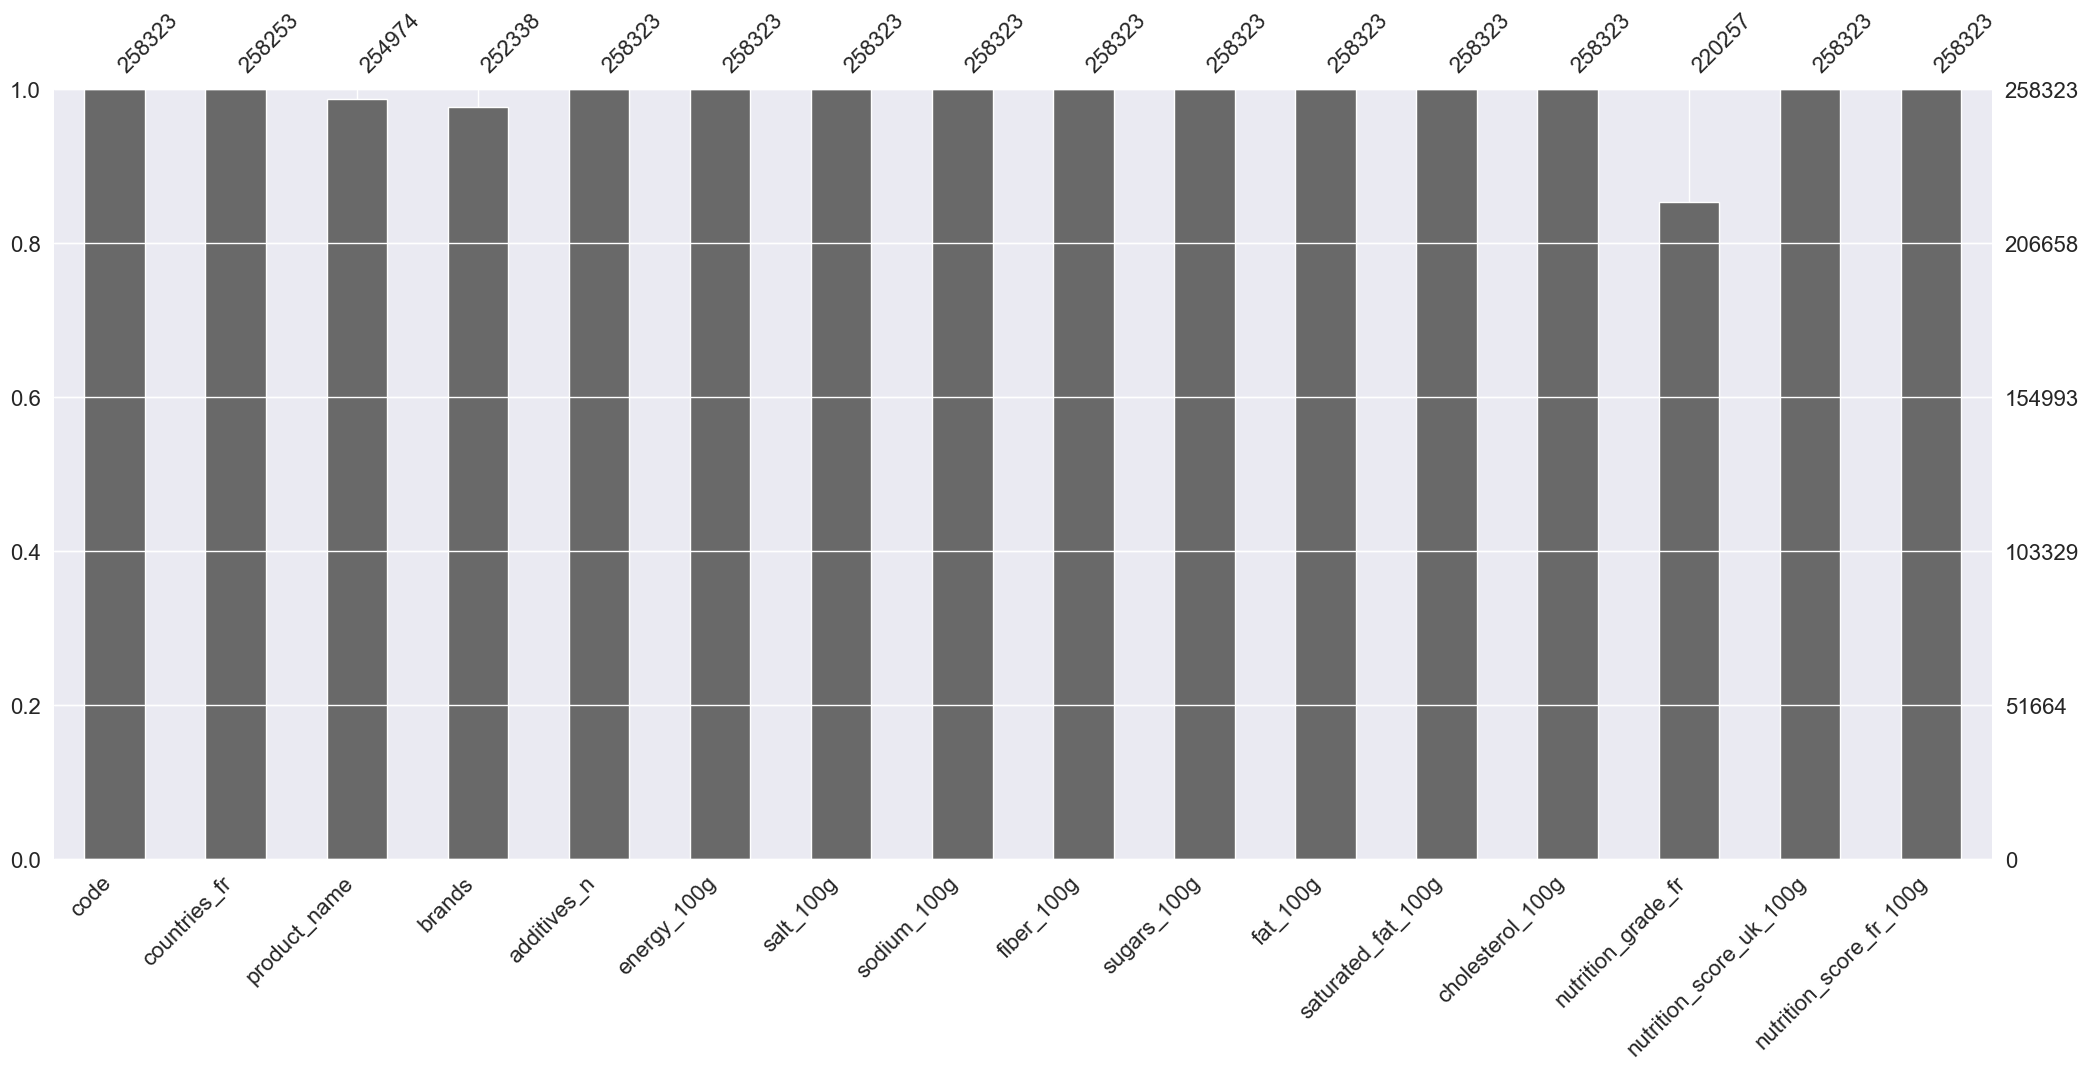

In [31]:
msno.bar(data_merged)

## <a name="C11">Suppression des individus qui ne possedent pas de nom de produits

<Axes: >

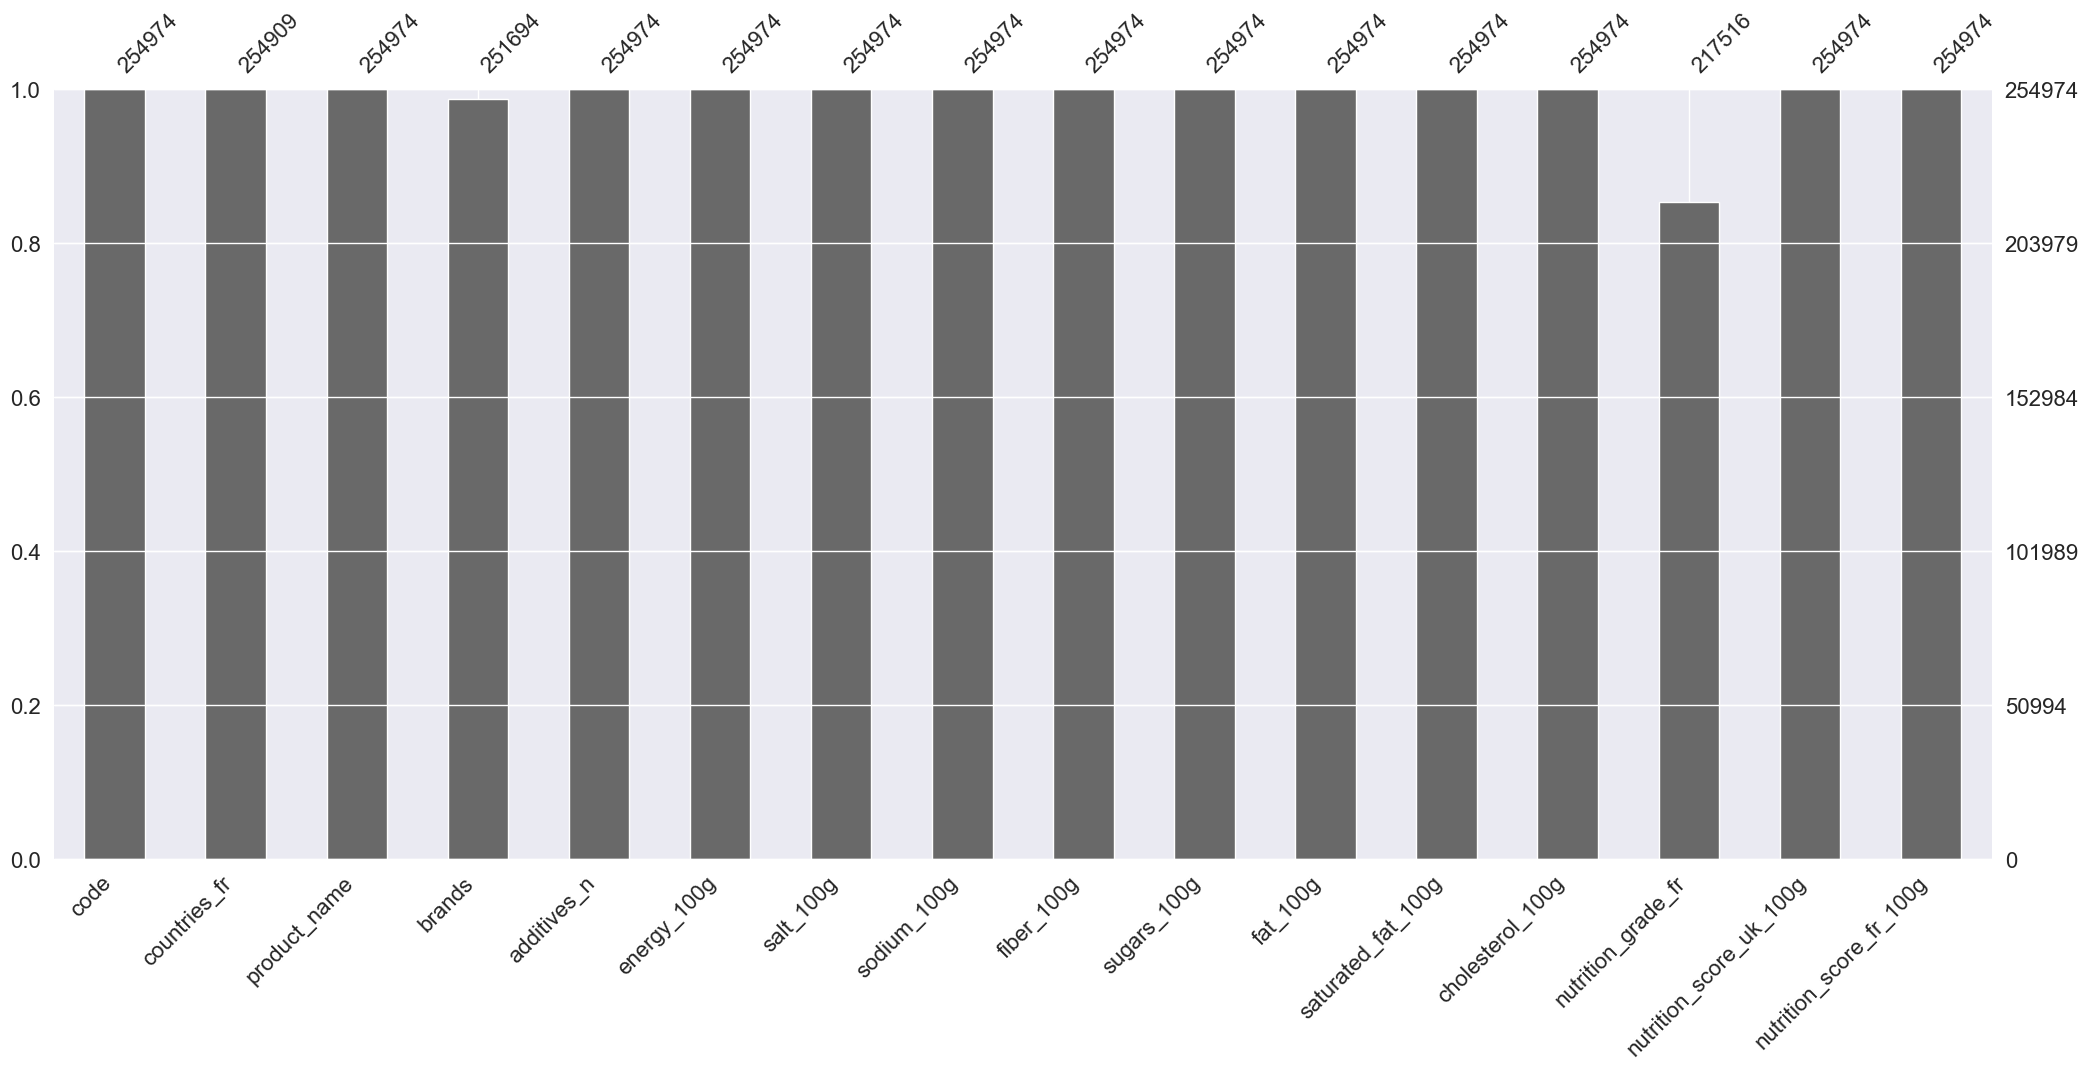

In [32]:
null_rows = data_merged.loc[data_merged['product_name'].isnull()]
data_merged.dropna(subset=['product_name'], inplace=True)
msno.bar(data_merged)

# Analyse bivariée


## <a name="C12">Nutrigrade et nutriscore

C:\Users\misss\anaconda3\envs\notebook\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='nutrition_grade_fr', ylabel='nutrition_score_fr_100g'>

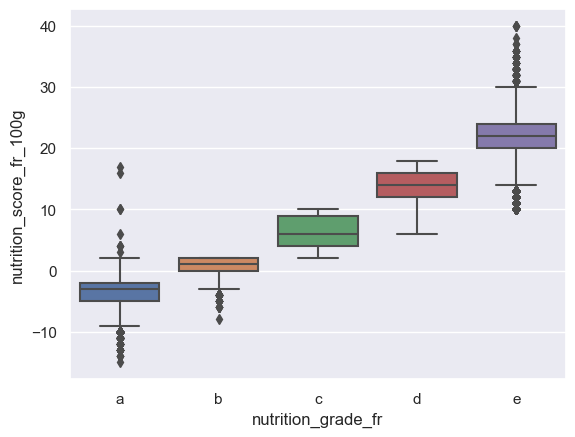

In [33]:
sns.boxplot(x=data_merged["nutrition_grade_fr"] ,y=data_merged["nutrition_score_fr_100g"])

In [34]:
def q1(x):
    return x.quantile(0.25)

def q3(x):
    return x.quantile(0.75)
data_merged.groupby('nutrition_grade_fr').agg({'nutrition_score_fr_100g': ['median', 'std', q1, q3]})

C:\Users\misss\AppData\Local\Temp\ipykernel_17112\1454381788.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_merged.groupby('nutrition_grade_fr').agg({'nutrition_score_fr_100g': ['median', 'std', q1, q3]})


nutrition_score_fr_100g                      
                                    median       std    q1    q3
nutrition_grade_fr                                              
a                                     -3.0  2.146562  -5.0  -2.0
b                                      1.0  0.859756   0.0   2.0
c                                      6.0  2.516365   4.0   9.0
d                                     14.0  2.311608  12.0  16.0
e                                     22.0  3.223817  20.0  24.0

C:\Users\misss\anaconda3\envs\notebook\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='nutrition_grade_fr', ylabel='nutrition_score_uk_100g'>

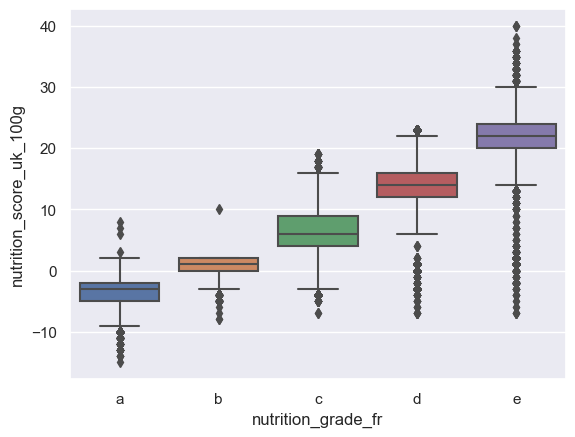

In [35]:
sns.boxplot(x=data_merged["nutrition_grade_fr"] ,y=data_merged["nutrition_score_uk_100g"])

In [36]:
data_merged.groupby('nutrition_grade_fr').agg({'nutrition_score_uk_100g': ['median', 'std', q1, q3]})

C:\Users\misss\AppData\Local\Temp\ipykernel_17112\2886286297.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_merged.groupby('nutrition_grade_fr').agg({'nutrition_score_uk_100g': ['median', 'std', q1, q3]})


nutrition_score_uk_100g                      
                                    median       std    q1    q3
nutrition_grade_fr                                              
a                                     -3.0  2.139875  -5.0  -2.0
b                                      1.0  0.923666   0.0   2.0
c                                      6.0  3.055320   4.0   9.0
d                                     14.0  2.976269  12.0  16.0
e                                     22.0  5.003481  20.0  24.0

On observe que le nutriscore fr et uk on quasiment la meme repartition par rapport au nutrigrade. On peut deduire la valeur du nutrigrade en fonction des nutriscores :
A: entre -15 et -2
B: entre -2 et 2
C: entre 2 et 9
D: entre 9 et 16
E: au dela de 16



A partir de cela on peut deduire les valeurs manquantes:


In [37]:
mask_1 = (data_merged['nutrition_grade_fr'].isnull()) 
mask= mask_1 & (data_merged['nutrition_score_fr_100g'] >= 19)

data_merged.loc[mask, 'nutrition_grade_fr'] = 'e'
mask= mask_1 & (data_merged['nutrition_score_fr_100g'] >= 11)
data_merged.loc[mask, 'nutrition_grade_fr'] = 'd'

mask= mask_1 & (data_merged['nutrition_score_fr_100g'] >= 3)
data_merged.loc[mask, 'nutrition_grade_fr'] = 'c'

mask= mask_1 & (data_merged['nutrition_score_fr_100g'] >= 1)
data_merged.loc[mask, 'nutrition_grade_fr'] = 'b'

mask= mask_1 & (data_merged['nutrition_score_fr_100g'] >= -15)
data_merged.loc[mask, 'nutrition_grade_fr'] = 'a'
data_merged.loc[mask, :]

code countries_fr  \
3                        0000000016094   États-Unis   
4                        0000000016100   États-Unis   
5                        0000000016117   États-Unis   
7                        0000000016193   États-Unis   
8                        0000000016513   États-Unis   
...                                ...          ...   
258310  976333456799876345676542346789       Suisse   
258311                   9763556636543   États-Unis   
258317                   9836654056565   États-Unis   
258319                          989898       Suisse   
258322                    999990026839   États-Unis   

                             product_name                           brands  \
3                         Organic Polenta                   Bob's Red Mill   
4       Breadshop Honey Gone Nuts Granola                             Unfi   
5           Organic Long Grain White Rice                         Lundberg   
7            Organic Dark Chocolate Minis                   Equal Exchange   
8                   Organic Sunflower Oil             Napa Valley Naturals   
...                                   ...                              ...   
258310                            retest                               NaN   
258311                 Taco Seasoning Mix        Mccormick & Company  Inc.   
258317                  Raspados Ice Bars  Jarritos,  The Jel Sert Company   
258319                        Test NF App                              NaN   
258322    Sugar Free Drink Mix, Peach Tea                    Market Pantry   

        additives_n  energy_100g  salt_100g  sodium_100g  fiber_100g  \
3               0.0      1552.00    0.00000     0.000000         5.7   
4               0.0      1933.00    0.00000     0.000000         7.7   
5               0.0      1490.00    0.00000     0.000000         0.0   
7               0.0      2406.00    0.00000     0.000000         7.5   
8               0.0      3586.00    0.00000     0.000000         0.0   
...             ...          ...        ...          ...         ...   
258310          0.0       448.59    1.00000     0.393701         7.0   
258311          0.0      1393.00   16.08582     6.333000         0.0   
258317          8.0       368.00    0.04572     0.018000         0.0   
258319          0.0       569.00    1.10000     0.433071         1.1   
258322          7.0      2092.00    0.00000     0.000000         0.0   

        sugars_100g  fat_100g  saturated_fat_100g  cholesterol_100g  \
3              0.00      1.43                0.00               0.0   
4             11.54     18.27                1.92               0.0   
5              0.00      0.00                0.00               0.0   
7             42.50     37.50               22.50               0.0   
8              0.00    100.00                7.14               0.0   
...             ...       ...                 ...               ...   
258310         0.00     22.30                0.00               0.0   
258311        16.67      0.00                0.00               0.0   
258317        19.30      0.00                0.00               0.0   
258319         9.60     31.00                0.00               0.0   
258322         0.00      0.00                0.00               0.0   

       nutrition_grade_fr  nutrition_score_uk_100g  nutrition_score_fr_100g  
3                       a                 5.344733                 5.323729  
4                       a                 8.012207                 7.898541  
5                       a                 6.827355                 6.809392  
7                       a                18.277754                18.060035  
8                       a                18.822279                17.765301  
...                   ...                      ...                      ...  
258310                  a                 3.326986                 3.571555  
258311                  a                12.050185                12.036976  
258317          

<Axes: >

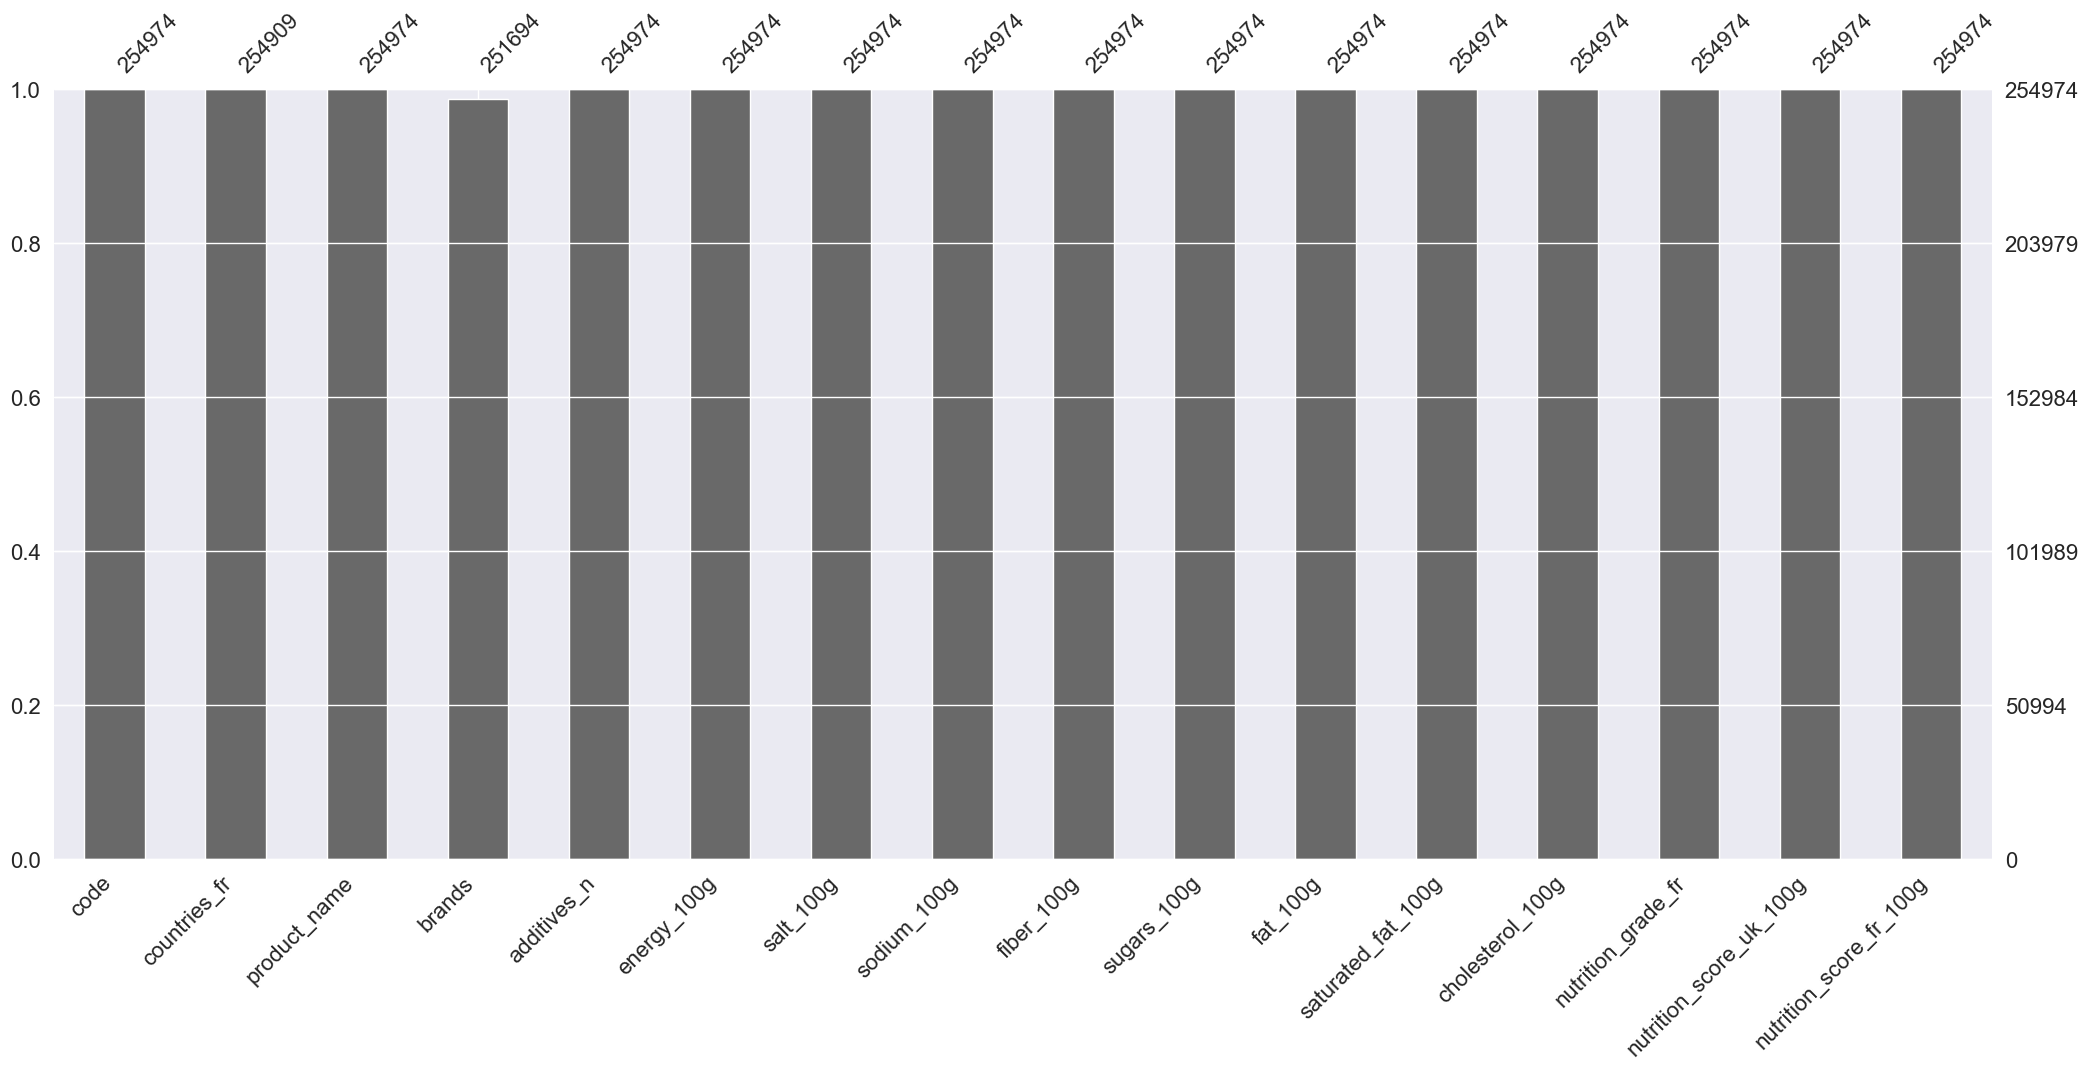

In [38]:
msno.bar(data_merged)

## <a name="C13">Rapport

In [39]:
df_profile = data_merged[[ "energy_100g", "salt_100g","sodium_100g", "fiber_100g","additives_n", "sugars_100g", "fat_100g","saturated_fat_100g","nutrition_score_uk_100g","nutrition_score_fr_100g", "cholesterol_100g"]]
profile = ProfileReport(df_profile, title="Profiling Report", infer_dtypes=False , html={'style': {'full_width': True}},     correlations={
        "pearson": {"calculate": True},
        "spearman": {"calculate": False},
        "kendall": {"calculate": False},
        "cramers": {"calculate": True},
        "phi_k": {"calculate": False},
    },)
profile.to_file("after_cleaning_numeric.html")


C:\Users\misss\anaconda3\envs\notebook\Lib\site-packages\ydata_profiling\utils\dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\misss\anaconda3\envs\notebook\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'd'')
  warnings.warn(
C:\Users\misss\anaconda3\envs\notebook\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
C:\Users\misss\anaconda3\envs\notebook\Lib\site-packages\ydata_profiling\model\missing.py:78: UserWarning: There was an attempt to generate the Heatmap missing values diagrams, but this failed.
To hide this warning, disable the calcu

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

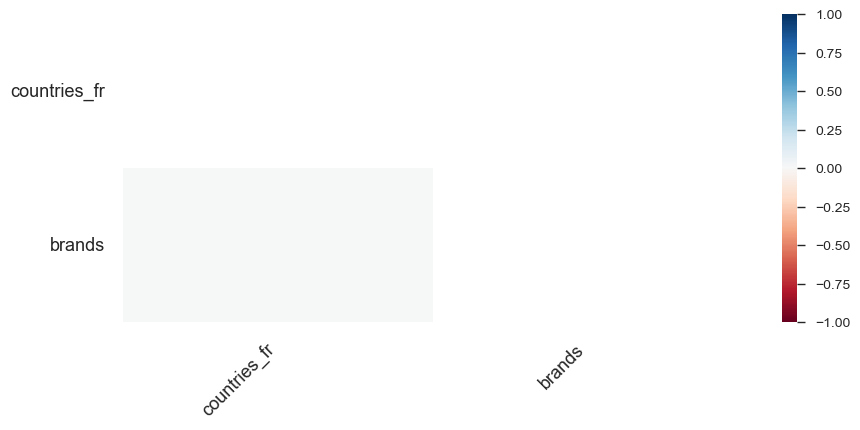

In [40]:
profile = ProfileReport(data_merged, title="Profiling Report", infer_dtypes=False , html={'style': {'full_width': True}})
profile.to_file("after_cleaning_all.html")

## <a name="C14">Repartition des nutrigrades

In [41]:
pie_grade = data_merged['nutrition_grade_fr'].value_counts().to_frame().reset_index()
pie_grade

nutrition_grade_fr  count
0                  a  72728
1                  d  62019
2                  c  44924
3                  e  42377
4                  b  32926

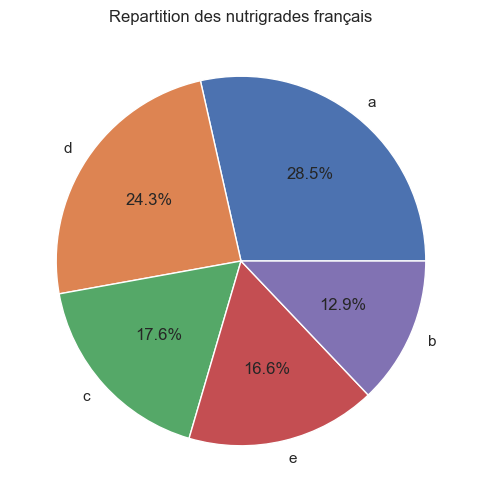

In [42]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(pie_grade['count'], labels=pie_grade['nutrition_grade_fr'], autopct='%1.1f%%')
plt.title('Repartition des nutrigrades français')
plt.show()

## <a name="C15">Scatter plot Nutriscore - Graisse Saturee (Correlées)

<Axes: xlabel='nutrition_score_fr_100g', ylabel='saturated_fat_100g'>

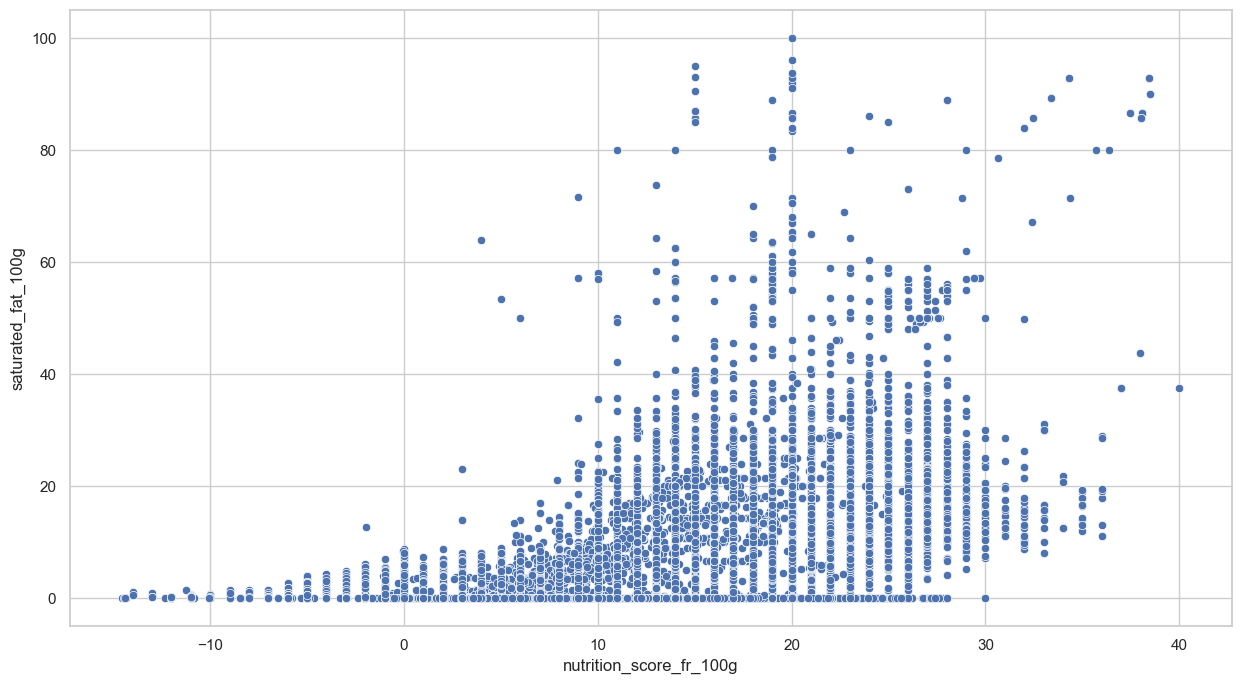

In [43]:
extract= data_merged.sample(frac=0.3, random_state=1)
plt.figure(figsize=(15,8))
sns.scatterplot(data=extract, x="nutrition_score_fr_100g", y="saturated_fat_100g")

## <a name="C16">Scatter plot Nutriscore - Fibree (Moins Correlées)

<Axes: xlabel='nutrition_score_fr_100g', ylabel='fiber_100g'>

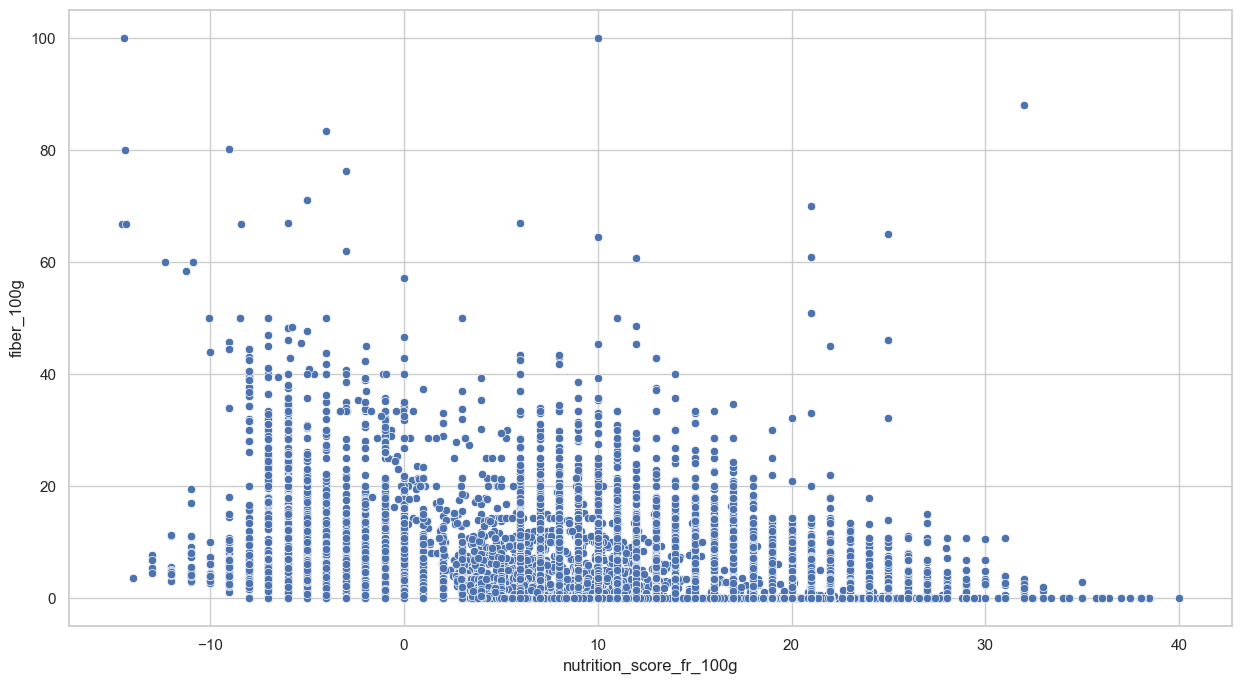

In [44]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=extract, x="nutrition_score_fr_100g", y="fiber_100g")

## <a name="C17">Scatter plot Sel - Sodium (Trés Correlées)

<Axes: xlabel='salt_100g', ylabel='sodium_100g'>

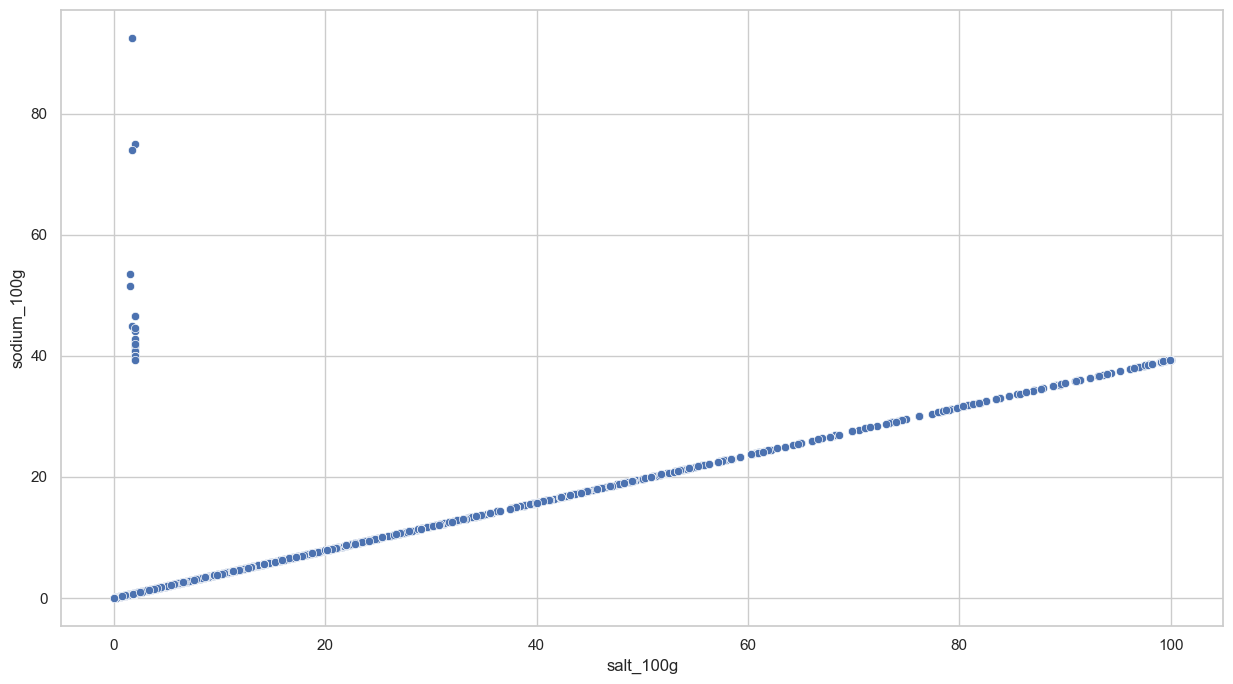

In [45]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=extract, x="salt_100g", y="sodium_100g")

## <a name="C18">ACP

Donnees centrees reduites

In [46]:
data_reduced = data_merged[["energy_100g", "salt_100g", "sodium_100g","additives_n", "sugars_100g", "fat_100g","fiber_100g","saturated_fat_100g","nutrition_score_uk_100g","nutrition_score_fr_100g", "cholesterol_100g"]]


In [47]:

scaler= preprocessing.StandardScaler()
data_scaled = scaler.fit_transform(data_reduced)
data_scaled = pd.DataFrame(data_scaled, columns = data_reduced.columns, index= data_reduced.index )
data_scaled

energy_100g  salt_100g  sodium_100g  additives_n  sugars_100g  \
0          1.420276  -0.253294    -0.242469    -0.667974    -0.039002   
1          1.034550  -0.151388    -0.148151    -0.667974     0.132232   
2          1.799616  -0.056819    -0.060623    -0.667974    -0.553183   
3          0.537705  -0.253294    -0.242469    -0.667974    -0.724417   
4          1.024332  -0.253294    -0.242469    -0.667974    -0.170905   
...             ...        ...          ...          ...          ...   
258318     0.653933  -0.144166    -0.141467    -1.059705    -0.599709   
258319    -0.717820  -0.076764    -0.079083    -0.667974    -0.263956   
258320     1.628466  -0.237246    -0.227616    -1.059705    -0.537835   
258321    -1.417746  -0.249218    -0.238696    -0.667974    -0.700435   
258322     1.227413  -0.253294    -0.242469     2.074142    -0.724417   

        fat_100g  fiber_100g  saturated_fat_100g  nutrition_score_uk_100g  \
0       0.961893    0.330154            3.150954                 0.568846   
1       0.340934    1.159653           -0.595889                -1.028947   
2       2.618363    1.159653            0.107054                 0.340590   
3      -0.611667    0.827853           -0.595889                -0.418963   
4       0.364706    1.301852           -0.344089                -0.114529   
...          ...         ...                 ...                      ...   
258318 -0.532235    0.875253           -0.517202                -1.485460   
258319  1.102783   -0.262345           -0.595889                -0.268729   
258320 -0.694577    2.368351           -0.106714                -1.028947   
258321 -0.682981   -0.475645           -0.569660                -1.028947   
258322 -0.694577   -0.523045           -0.595889                 0.083601   

        nutrition_score_fr_100g  cholesterol_100g  
0                      0.563912          0.024742  
1                     -1.059774         -0.042085  
2                      0.331957         -0.042085  
3                     -0.442341         -0.042085  
4                     -0.143720         -0.042085  
...                         ...               ...  
258318                -1.523684         -0.042085  
258319                -0.260841         -0.042085  
258320                -1.059774         -0.042085  
258321                -0.827819         -0.042085  
258322                 0.042217         -0.042085  

[254974 rows x 11 columns]

In [48]:
n_components = 11
pca = decomposition.PCA(n_components = 11)
data_projeted = pca.fit_transform(data_scaled)
pd.DataFrame(data_projeted, columns = ["F"+str(i+1) for i in range(11)], index= data_reduced.index )

F1        F2        F3        F4        F5        F6        F7  \
0       2.741284 -0.830450  1.450119  0.457491 -0.320624  0.205016  1.316179   
1      -0.681926 -0.773186  1.289883 -1.125707  0.591476  0.102239 -0.901378   
2       1.998889 -0.718835  2.260743 -0.443289  0.128900 -0.528602 -1.444589   
3      -0.849529 -0.491493  0.908920 -0.529136  0.262949  0.181689 -0.190161   
4       0.235866 -0.718862  1.209447 -0.960509  0.490388  0.097301 -0.479413   
...          ...       ...       ...       ...       ...       ...       ...   
258318 -1.753436 -0.655519  1.538357 -0.665000  0.330232  0.352201 -0.461856   
258319 -0.459032 -0.118006  0.579539  0.474837 -0.363607  0.293482 -0.722111   
258320 -0.791816 -1.027109  2.165580 -1.755274  0.979470  0.127885  0.024359   
258321 -2.171692 -0.136053  0.149017  0.682722 -0.434028  0.512405  0.225281   
258322 -0.000534 -0.177160 -1.118465  0.079346 -0.000438 -1.864879 -0.640266   

              F8        F9       F10       F11  
0       1.124694 -0.728122 -0.020650  0.060634  
1       0.537079 -0.350020 -0.022218  0.021938  
2      -0.075814  0.476722 -0.003358  0.046145  
3      -0.639325 -0.743889  0.026811 -0.006765  
4      -0.353364 -0.258263  0.016798 -0.002557  
...          ...       ...       ...       ...  
258318  0.420610 -0.927785 -0.018895  0.019703  
258319 -0.019897  1.139757 -0.009501 -0.007017  
258320 -0.045950 -1.423620  0.006570  0.031092  
258321 -0.099275  0.282473  0.004488  0.120245  
258322 -0.484790 -1.471542  0.033861  0.003744  

[254974 rows x 11 columns]

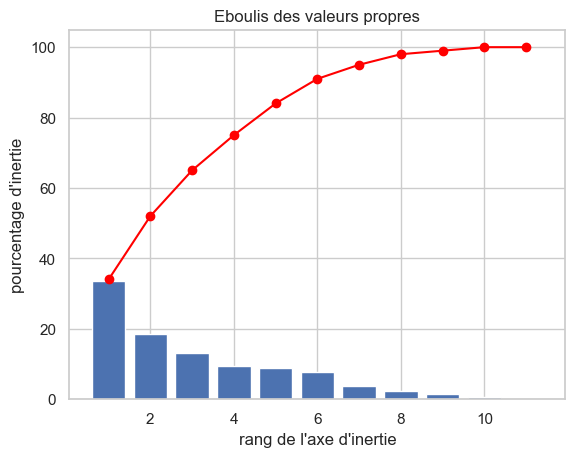

In [49]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
x_list = range(1, n_components+1)
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [50]:
x_y = (0,1)
features = data_scaled.columns
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations"""

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image
    fig, ax = plt.subplots(figsize=(8, 7))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

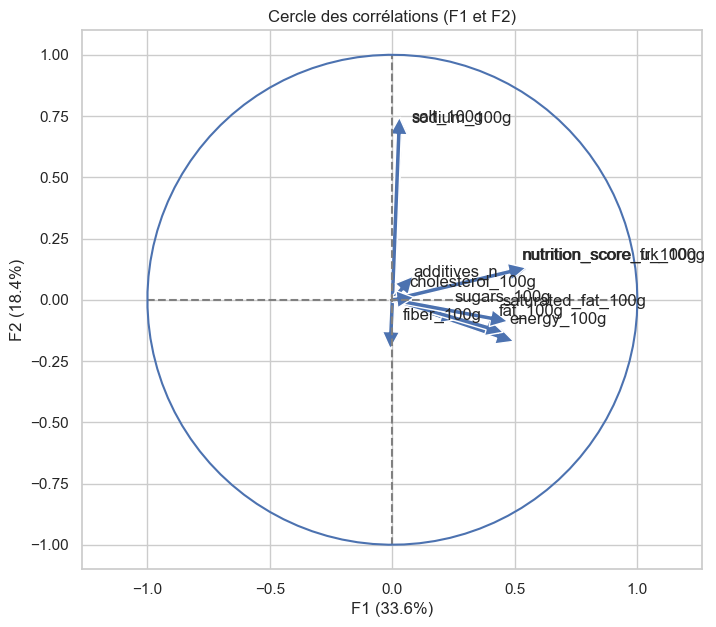

In [51]:
correlation_graph(pca, x_y, features)

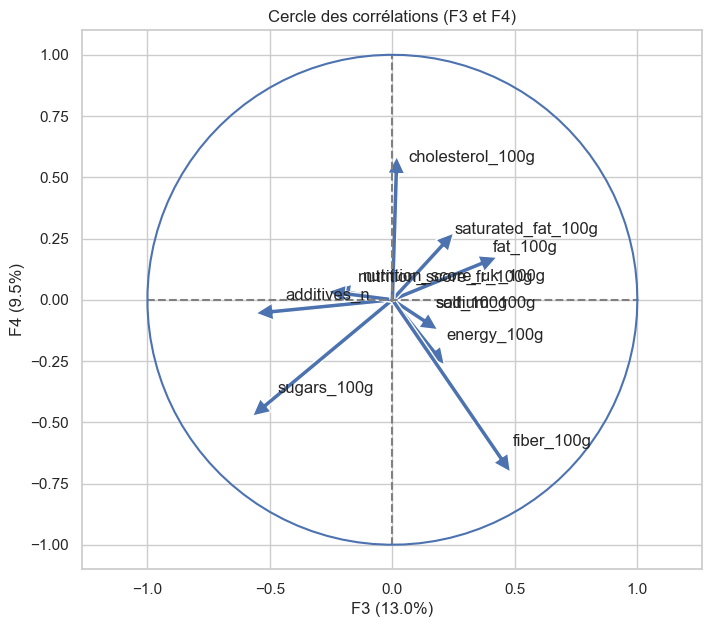

In [52]:
correlation_graph(pca,(2,3), features)

In [53]:
pcs = pd.DataFrame(pca.components_)
pcs

0         1         2         3         4         5         6   \
0   0.428828  0.029456  0.026164  0.037603  0.202807  0.385294 -0.005653   
1  -0.147101  0.675653  0.674721  0.042987 -0.059621 -0.112853 -0.130796   
2   0.168863  0.125069  0.127007 -0.487462 -0.517122  0.362173  0.442387   
3  -0.211154 -0.083390 -0.083858 -0.048326 -0.430057  0.147263 -0.645766   
4   0.106617  0.044843  0.044680  0.078256  0.241083 -0.103195  0.398982   
5  -0.069713 -0.017503 -0.013109 -0.858928  0.392495 -0.225507 -0.190966   
6  -0.450667 -0.035155 -0.039670  0.056366 -0.053684 -0.435954  0.318082   
7   0.091600  0.103973  0.152147  0.097419  0.481481  0.227628 -0.208487   
8  -0.702017 -0.021904 -0.017614 -0.014904  0.236087  0.618416  0.172457   
9  -0.001467 -0.710713  0.702638  0.000369 -0.017517 -0.009932  0.007286   
10  0.028623  0.008485  0.001827  0.003616 -0.005321  0.006858 -0.007009   

          7         8         9         10  
0   0.401622  0.483872  0.477239  0.018364  
1  -0.075246  0.112533  0.114149  0.001924  
2   0.202586 -0.171568 -0.192551  0.015797  
3   0.220674  0.028783  0.024790  0.515077  
4  -0.132546 -0.022803 -0.019855  0.855607  
5  -0.023838  0.073932  0.088666  0.040443  
6   0.689798  0.092649  0.109691 -0.018990  
7   0.474432 -0.427135 -0.462040  0.006681  
8  -0.154663  0.066587  0.099436 -0.001322  
9  -0.012696  0.012465  0.020233 -0.000118  
10  0.013194 -0.722037  0.690982 -0.000006

In [54]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

energy_100g  salt_100g  sodium_100g  additives_n  sugars_100g  fat_100g  \
F1          0.43       0.03         0.03         0.04         0.20      0.39   
F2         -0.15       0.68         0.67         0.04        -0.06     -0.11   
F3          0.17       0.13         0.13        -0.49        -0.52      0.36   
F4         -0.21      -0.08        -0.08        -0.05        -0.43      0.15   
F5          0.11       0.04         0.04         0.08         0.24     -0.10   
F6         -0.07      -0.02        -0.01        -0.86         0.39     -0.23   
F7         -0.45      -0.04        -0.04         0.06        -0.05     -0.44   
F8          0.09       0.10         0.15         0.10         0.48      0.23   
F9         -0.70      -0.02        -0.02        -0.01         0.24      0.62   
F10        -0.00      -0.71         0.70         0.00        -0.02     -0.01   
F11         0.03       0.01         0.00         0.00        -0.01      0.01   

     fiber_100g  saturated_fat_100g  nutrition_score_uk_100g  \
F1        -0.01                0.40                     0.48   
F2        -0.13               -0.08                     0.11   
F3         0.44                0.20                    -0.17   
F4        -0.65                0.22                     0.03   
F5         0.40               -0.13                    -0.02   
F6        -0.19               -0.02                     0.07   
F7         0.32                0.69                     0.09   
F8        -0.21                0.47                    -0.43   
F9         0.17               -0.15                     0.07   
F10        0.01               -0.01                     0.01   
F11       -0.01                0.01                    -0.72   

     nutrition_score_fr_100g  cholesterol_100g  
F1                      0.48              0.02  
F2                      0.11              0.00  
F3                     -0.19              0.02  
F4                      0.02              0.52  
F5                     -0.02              0.86  
F6                      0.09              0.04  
F7                      0.11             -0.02  
F8                     -0.46              0.01  
F9                      0.10             -0.00  
F10                     0.02             -0.00  
F11                     0.69             -0.00

In [55]:
pcs.T

F1        F2        F3        F4        F5  \
energy_100g              0.428828 -0.147101  0.168863 -0.211154  0.106617   
salt_100g                0.029456  0.675653  0.125069 -0.083390  0.044843   
sodium_100g              0.026164  0.674721  0.127007 -0.083858  0.044680   
additives_n              0.037603  0.042987 -0.487462 -0.048326  0.078256   
sugars_100g              0.202807 -0.059621 -0.517122 -0.430057  0.241083   
fat_100g                 0.385294 -0.112853  0.362173  0.147263 -0.103195   
fiber_100g              -0.005653 -0.130796  0.442387 -0.645766  0.398982   
saturated_fat_100g       0.401622 -0.075246  0.202586  0.220674 -0.132546   
nutrition_score_uk_100g  0.483872  0.112533 -0.171568  0.028783 -0.022803   
nutrition_score_fr_100g  0.477239  0.114149 -0.192551  0.024790 -0.019855   
cholesterol_100g         0.018364  0.001924  0.015797  0.515077  0.855607   

                               F6        F7        F8        F9       F10  \
energy_100g             -0.069713 -0.450667  0.091600 -0.702017 -0.001467   
salt_100g               -0.017503 -0.035155  0.103973 -0.021904 -0.710713   
sodium_100g             -0.013109 -0.039670  0.152147 -0.017614  0.702638   
additives_n             -0.858928  0.056366  0.097419 -0.014904  0.000369   
sugars_100g              0.392495 -0.053684  0.481481  0.236087 -0.017517   
fat_100g                -0.225507 -0.435954  0.227628  0.618416 -0.009932   
fiber_100g              -0.190966  0.318082 -0.208487  0.172457  0.007286   
saturated_fat_100g      -0.023838  0.689798  0.474432 -0.154663 -0.012696   
nutrition_score_uk_100g  0.073932  0.092649 -0.427135  0.066587  0.012465   
nutrition_score_fr_100g  0.088666  0.109691 -0.462040  0.099436  0.020233   
cholesterol_100g         0.040443 -0.018990  0.006681 -0.001322 -0.000118   

                              F11  
energy_100g              0.028623  
salt_100g                0.008485  
sodium_100g              0.001827  
additives_n              0.003616  
sugars_100g             -0.005321  
fat_100g                 0.006858  
fiber_100g              -0.007009  
saturated_fat_100g       0.013194  
nutrition_score_uk_100g -0.722037  
nutrition_score_fr_100g  0.690982  
cholesterol_100g        -0.000006

<Axes: >

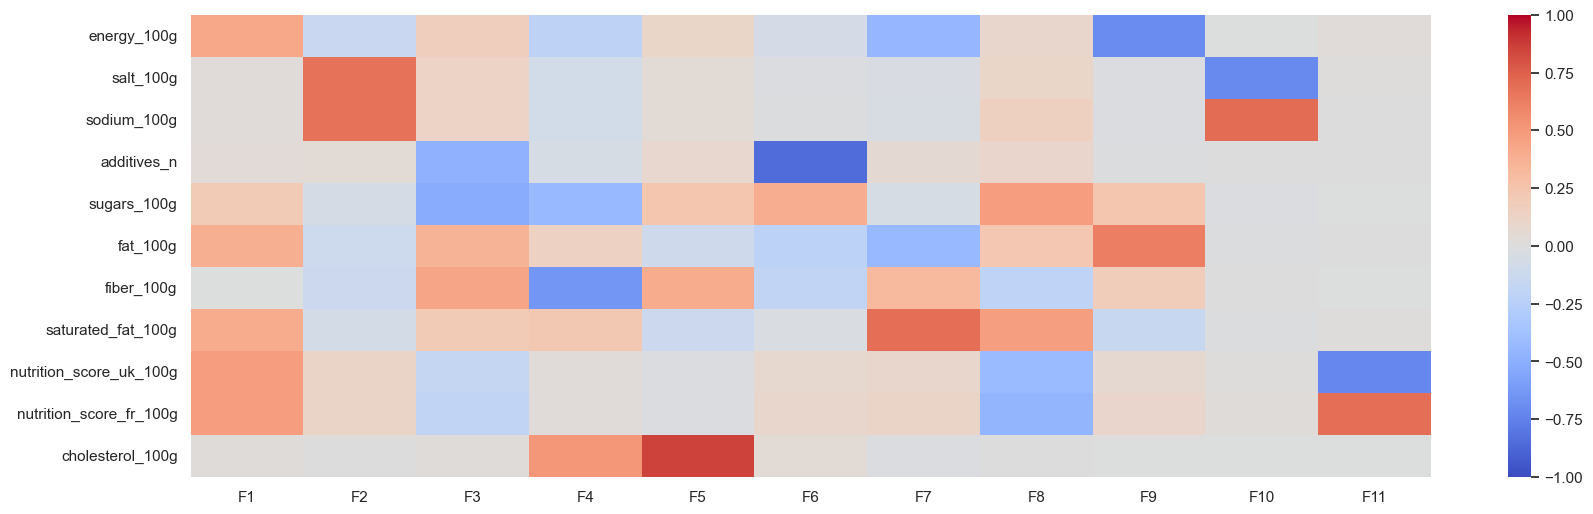

In [56]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=False, cmap="coolwarm", fmt="0.4f")

## <a name="C19">ANOVA

Influence de la graisse saturee sur le nutrition score

In [57]:
anova_graisse = smf.ols('nutrition_score_fr_100g~saturated_fat_100g', data=data_merged.sample(10)).fit()
print(anova_graisse.summary())

                               OLS Regression Results                              
Dep. Variable:     nutrition_score_fr_100g   R-squared:                       0.709
Model:                                 OLS   Adj. R-squared:                  0.673
Method:                      Least Squares   F-statistic:                     19.53
Date:                     Fri, 07 Jun 2024   Prob (F-statistic):            0.00223
Time:                             17:46:09   Log-Likelihood:                -31.268
No. Observations:                       10   AIC:                             66.54
Df Residuals:                            8   BIC:                             67.14
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

C:\Users\misss\anaconda3\envs\notebook\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Test de Fisher

In [58]:
sm.stats.anova_lm(anova_graisse, typ=2)

sum_sq   df          F    PR(>F)
saturated_fat_100g  743.22922  1.0  19.534838  0.002227
Residual            304.37078  8.0        NaN       NaN

In [59]:
anova_fiber = smf.ols('nutrition_score_fr_100g~fiber_100g', data=data_merged).fit()
print(anova_fiber.summary())
sm.stats.anova_lm(anova_fiber, typ=2)

                               OLS Regression Results                              
Dep. Variable:     nutrition_score_fr_100g   R-squared:                       0.025
Model:                                 OLS   Adj. R-squared:                  0.025
Method:                      Least Squares   F-statistic:                     6539.
Date:                     Fri, 07 Jun 2024   Prob (F-statistic):               0.00
Time:                             17:46:09   Log-Likelihood:            -9.0787e+05
No. Observations:                   254974   AIC:                         1.816e+06
Df Residuals:                       254972   BIC:                         1.816e+06
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
In

sum_sq        df            F  PR(>F)
fiber_100g  4.739553e+05       1.0  6538.508624     0.0
Residual    1.848209e+07  254972.0          NaN     NaN

In [60]:
anova_sodium = smf.ols('salt_100g~sodium_100g', data=data_merged.sample(10)).fit()
print(anova_sodium.summary())
sm.stats.anova_lm(anova_sodium, typ=2)

                            OLS Regression Results                            
Dep. Variable:              salt_100g   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.711e+31
Date:                Fri, 07 Jun 2024   Prob (F-statistic):          2.07e-123
Time:                        17:46:09   Log-Likelihood:                 342.90
No. Observations:                  10   AIC:                            -681.8
Df Residuals:                       8   BIC:                            -681.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.331e-16   1.77e-16     -1.884      

C:\Users\misss\anaconda3\envs\notebook\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


sum_sq   df             F         PR(>F)
sodium_100g  3.260979e+00  1.0  2.711285e+31  2.072609e-123
Residual     9.621946e-31  8.0           NaN            NaN

In [61]:
anova_sodium_on_fiber = smf.ols('fiber_100g~fiber_100g', data=data_merged.sample(10)).fit()
print(anova_sodium_on_fiber.summary())
sm.stats.anova_lm(anova_sodium_on_fiber, typ=2)

                            OLS Regression Results                            
Dep. Variable:             fiber_100g   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.151e+32
Date:                Fri, 07 Jun 2024   Prob (F-statistic):          6.38e-126
Time:                        17:46:09   Log-Likelihood:                 330.79
No. Observations:                  10   AIC:                            -657.6
Df Residuals:                       8   BIC:                            -657.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.22e-16   5.37e-16      0.414      0.6

C:\Users\misss\anaconda3\envs\notebook\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


sum_sq   df             F         PR(>F)
fiber_100g  1.560690e+02  1.0  1.151075e+32  6.379755e-126
Residual    1.084684e-29  8.0           NaN            NaN

Anova 2 facteurs


In [62]:
anova_fat_energy = smf.ols('nutrition_score_fr_100g~saturated_fat_100g*energy_100g', data=data_merged).fit()
print(anova_fat_energy.summary())
sm.stats.anova_lm(anova_fat_energy)

                               OLS Regression Results                              
Dep. Variable:     nutrition_score_fr_100g   R-squared:                       0.528
Model:                                 OLS   Adj. R-squared:                  0.528
Method:                      Least Squares   F-statistic:                 9.503e+04
Date:                     Fri, 07 Jun 2024   Prob (F-statistic):               0.00
Time:                             17:46:09   Log-Likelihood:            -8.1542e+05
No. Observations:                   254974   AIC:                         1.631e+06
Df Residuals:                       254970   BIC:                         1.631e+06
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

df        sum_sq       mean_sq  \
saturated_fat_100g                   1.0  7.121374e+06  7.121374e+06   
energy_100g                          1.0  2.188866e+06  2.188866e+06   
saturated_fat_100g:energy_100g       1.0  6.962454e+05  6.962454e+05   
Residual                        254970.0  8.949565e+06  3.510046e+01   

                                            F  PR(>F)  
saturated_fat_100g              202885.474351     0.0  
energy_100g                      62360.023251     0.0  
saturated_fat_100g:energy_100g   19835.789790     0.0  
Residual                                  NaN     NaN

# <a name="C20">Fonctions nettoyage réutilisables

In [63]:
def clean_data(data):
    # selection des colonnes et renommage
    data = data[["code","countries_fr", "product_name", "brands", "energy_100g", "salt_100g", "sodium_100g", "fiber_100g","additives_n", "sugars_100g", "fat_100g","saturated-fat_100g","nutrition-score-uk_100g","nutrition-score-fr_100g", "nutrition_grade_fr", "cholesterol_100g"]]
    data = data.rename(columns={"saturated-fat_100g": "saturated_fat_100g", "nutrition-score-uk_100g": "nutrition_score_uk_100g", "nutrition-score-fr_100g": "nutrition_score_fr_100g"})
    
    # changement de type pour category
    data = data.astype({"nutrition_grade_fr": 'category', "countries_fr": 'category', "brands": 'category'})
    
    # remplacement outliers nutriments
    data = replace_outliers(data)
    
    # Nan Additifs
    data['additives_n'] = data['additives_n'].fillna(-1)
    
    # supprime les lignes avec des individus qui ne possedent aucun nutriments
    data = delete_no_nutriment(data)
    
    # supprime les colonnes avec un code null
    null_rows = data.loc[data['code'].isnull()]
    data.dropna(subset=['code'], inplace=True)
    
    #complete les nutriscore manquants
    data = impute_missing_nutriscore(data)
    
    # supprime les colonnes sans nom de produit
    null_rows = data.loc[data['product_name'].isnull()]
    data.dropna(subset=['product_name'], inplace=True)
    
    # attribu un grade
    data = impute_nutrition_grade(data)
    
    return data

def replace_outliers(data):
    '''remplacement outliers nutriments'''
    composant_list=["fiber_100g", "sugars_100g", "fat_100g","saturated_fat_100g", "cholesterol_100g", "salt_100g","sodium_100g", "energy_100g"]
    nutrigrade_list = data['nutrition_grade_fr'].unique()

    for composant in composant_list:
        mask = (data[composant] < 0) | (data[composant] > 100)
        if(composant == "energy_100g"):
            mask = (data[composant] < 0) | (data[composant] > 3700)
        column_mean = data[composant].mean()
        data[composant] = data[composant].fillna(0)
        for nutrigrade in nutrigrade_list:
            nutri_mean = data.loc[data['nutrition_grade_fr'] == nutrigrade, composant].mean()
            if(pd.isna(nutrigrade)):
                data.loc[(mask), composant] = column_mean
            else :
                data.loc[(mask) & (data['nutrition_grade_fr'] == nutrigrade), composant] = nutri_mean
    return data
 
def delete_no_nutriment(data):
    '''supprime les lignes avec des individus qui ne possedent aucun nutriments'''
    mask = ((data["energy_100g"]==0) 
    & (data["salt_100g"]==0)
    & (data["sodium_100g"]==0)
    & (data["fiber_100g"]==0)
    & (data["fat_100g"]==0)
    & (data["fat_100g"]==0)
    & (data["saturated_fat_100g"]==0)
    & (data["cholesterol_100g"]==0)
   )
    data.drop(data[mask].index, inplace = True)
    return data

def impute_missing_nutriscore(data):
    '''complete les nutriscore manquants'''
    data_score  = data[["energy_100g", "salt_100g", "sodium_100g","fiber_100g","additives_n", "sugars_100g", "fat_100g","saturated_fat_100g","nutrition_score_uk_100g","nutrition_score_fr_100g", "cholesterol_100g"]]
    imputer = IterativeImputer(max_iter=50,min_value=-15,max_value=40)
    imputed = imputer.fit_transform(data_score)
    df_imputed = pd.DataFrame(imputed, columns=data_score.columns)
    data.reset_index(drop=True, inplace=True)
    data_merged = pd.concat([data[["code","countries_fr", "product_name", "brands","additives_n", "energy_100g" ,"salt_100g", "sodium_100g","fiber_100g", "sugars_100g", "fat_100g","saturated_fat_100g", "cholesterol_100g","nutrition_grade_fr"]], df_imputed[["nutrition_score_uk_100g","nutrition_score_fr_100g"]]], axis=1)
    return data_merged

def impute_nutrition_grade(data):
    '''attribu un grade'''
    mask_1 = (data['nutrition_grade_fr'].isnull()) 
    mask= mask_1 & (data['nutrition_score_fr_100g'] >= 19)
    
    data_merged.loc[mask, 'nutrition_grade_fr'] = 'e'
    mask= mask_1 & (data['nutrition_score_fr_100g'] >= 11)
    data_merged.loc[mask, 'nutrition_grade_fr'] = 'd'
    
    mask= mask_1 & (data['nutrition_score_fr_100g'] >= 3)
    data_merged.loc[mask, 'nutrition_grade_fr'] = 'c'
    
    mask= mask_1 & (data['nutrition_score_fr_100g'] >= 1)
    data_merged.loc[mask, 'nutrition_grade_fr'] = 'b'
    
    mask= mask_1 & (data['nutrition_score_fr_100g'] >= -15)
    data.loc[mask, 'nutrition_grade_fr'] = 'a'
    return data

In [64]:
test_data = clean_data(data)
test_data

code countries_fr                         product_name  \
0       0000000004530   États-Unis       Banana Chips Sweetened (Whole)   
1       0000000004559   États-Unis                              Peanuts   
2       0000000016087   États-Unis               Organic Salted Nut Mix   
3       0000000016094   États-Unis                      Organic Polenta   
4       0000000016100   États-Unis    Breadshop Honey Gone Nuts Granola   
...               ...          ...                                  ...   
258318  9847548283004       France  Tartines craquantes bio au sarrasin   
258319         989898       Suisse                          Test NF App   
258320  9900000000233       France                              Amandes   
258321       99111250       France                   Thé vert Earl grey   
258322   999990026839   États-Unis      Sugar Free Drink Mix, Peach Tea   

                    brands  additives_n  energy_100g  salt_100g  sodium_100g  \
0                      NaN          0.0       2243.0    0.00000     0.000000   
1           Torn & Glasser          0.0       1941.0    0.63500     0.250000   
2                Grizzlies          0.0       2540.0    1.22428     0.482000   
3           Bob's Red Mill          0.0       1552.0    0.00000     0.000000   
4                     Unfi          0.0       1933.0    0.00000     0.000000   
...                    ...          ...          ...        ...          ...   
258318  Le Pain des fleurs         -1.0       1643.0    0.68000     0.267717   
258319                 NaN          0.0        569.0    1.10000     0.433071   
258320              Biosic         -1.0       2406.0    0.10000     0.039370   
258321             Lobodis          0.0         21.0    0.02540     0.010000   
258322       Market Pantry          7.0       2092.0    0.00000     0.000000   

        fiber_100g  sugars_100g  fat_100g  saturated_fat_100g  \
0              3.6        14.29     28.57               28.57   
1              7.1        17.86     17.86                0.00   
2              7.1         3.57     57.14                5.36   
3              5.7         0.00      1.43                0.00   
4              7.7        11.54     18.27                1.92   
...            ...          ...       ...                 ...   
258318         5.9         2.60      2.80                0.60   
258319         1.1         9.60     31.00                0.00   
258320        12.2         3.89      0.00                3.73   
258321         0.2         0.50      0.20                0.20   
258322         0.0         0.00      0.00                0.00   

        cholesterol_100g nutrition_grade_fr  nutrition_score_uk_100g  \
0                  0.018                  d                14.000000   
1                  0.000                  b                 0.000000   
2                  0.000                  d                12.000000   
3                  0.000                  a                 5.344733   
4                  0.000                  a                 8.012207   
...                  ...                ...                      ...   
258318             0.000                  a                -4.000000   
258319             0.000                  a                 6.661093   
258320             0.000                  b                 0.000000   
258321             0.000                  c                 0.000000   
258322             0.000                  a                 9.748240   

        nutrition_score_fr_100g  
0                     14.000000  
1                      0.000000  
2                     12.000000  
3                      5.323729  
4                      7.898541  
...                         ...  
258318                -4.000000  
258319                 6.888682  
258320                 0.000000  
258321                 2.000000  
258322                 9.501761  

[254974 rows x 16 columns]

<Axes: >

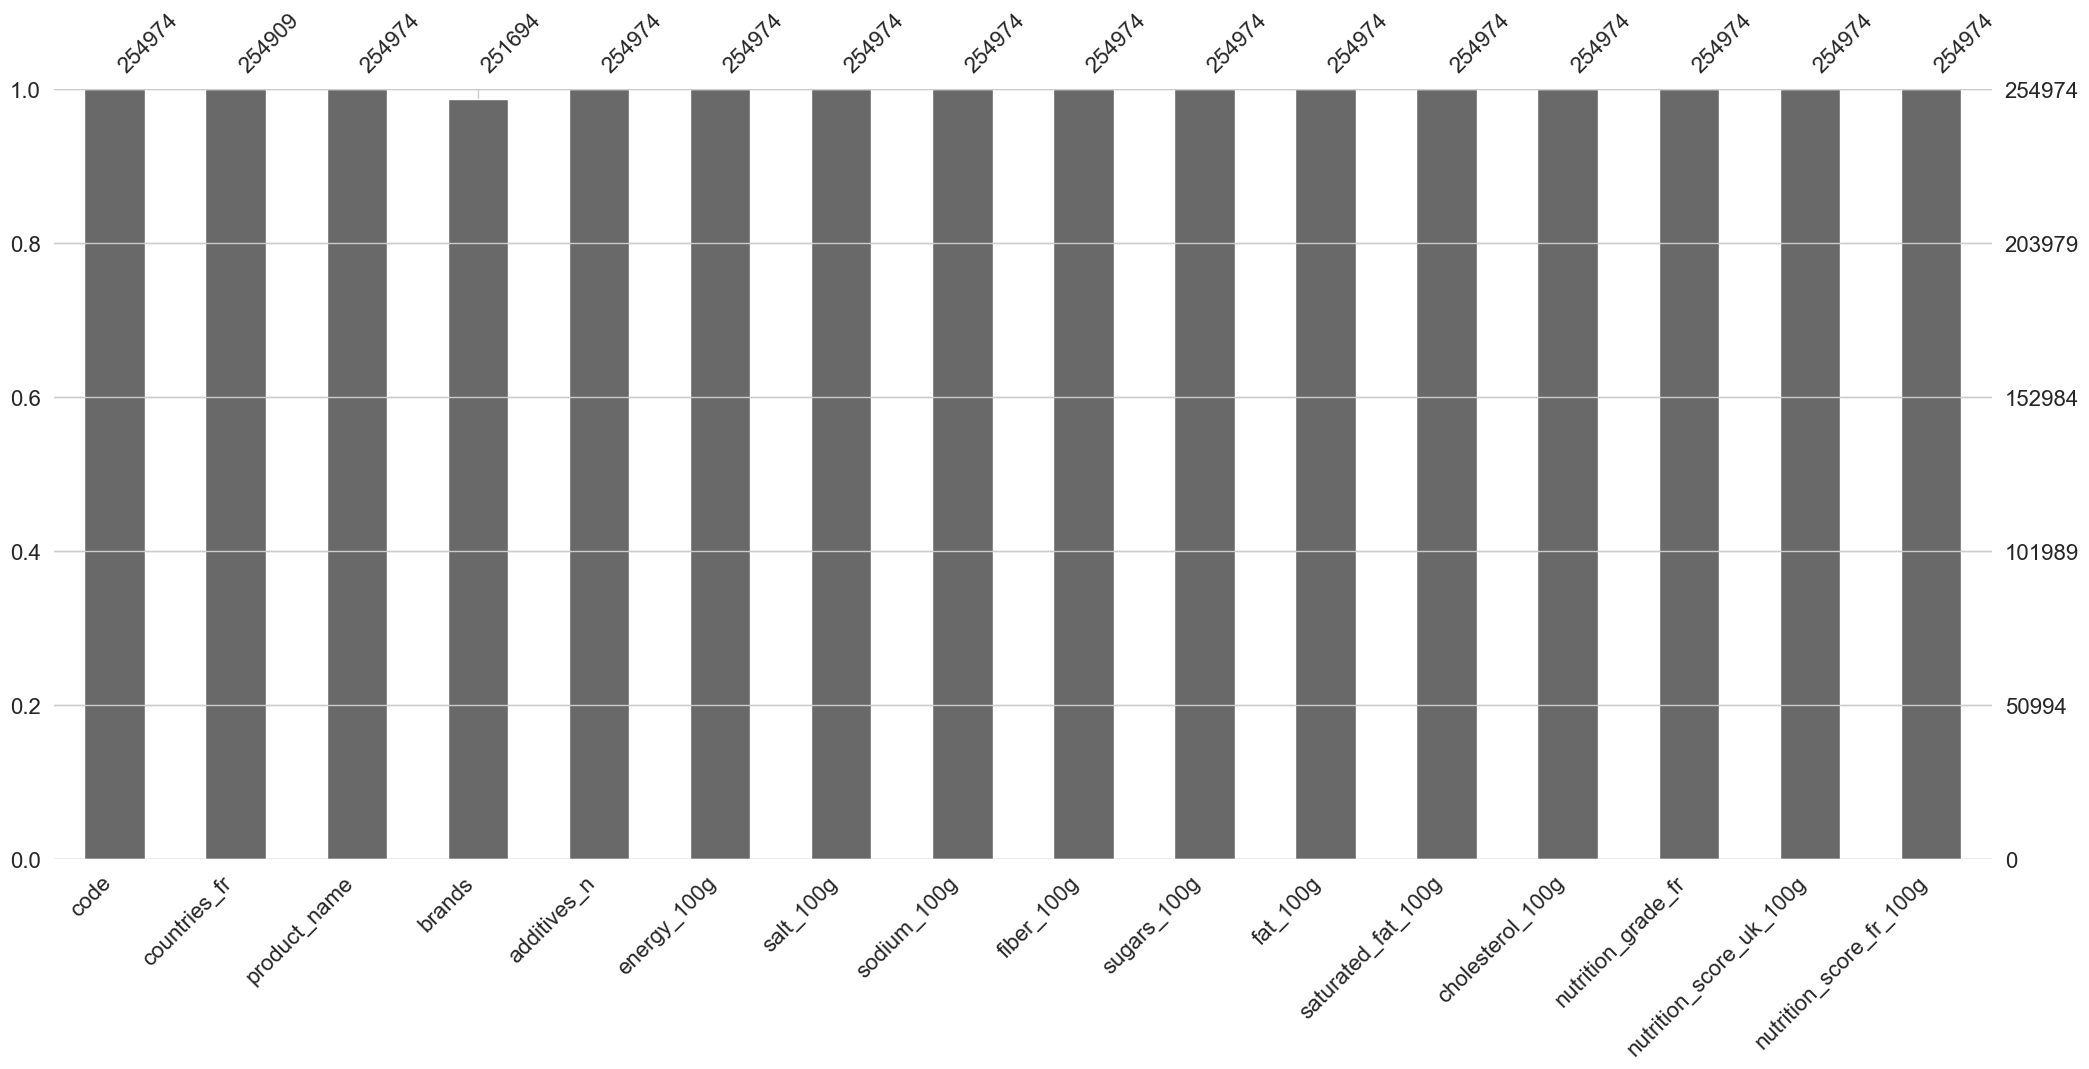

In [65]:
msno.bar(test_data)

In [66]:
test_data.shape

(254974, 16)